<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [72]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [79]:
# Code to read in sat_Scores info

sat_score_file = './sat_scores.csv'
final_dict = {}    

# Read file as first line and get all columns name
# Init new dictionary with these column name
with open(sat_score_file, 'r') as f:
    raw_pd = csv.reader(f)

    first_attempt_header = True
    for row in raw_pd:     
        if first_attempt_header:
            final_dict = dict.fromkeys(row,[])    
            first_attempt_header = False
        break

# Read file again as dictionary reader
# Add value each row to approximate list.
with open(sat_score_file,'r') as f:    
    for row in map(dict,csv.DictReader(f)):
        for key, value in row.items():
            final_dict[str(key)].append(value)

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [3]:
# Read file with pandas
df_sat_score = pd.read_csv(sat_score_file)
df_sat_score.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### Compare different between loading from file and inputting this dictionary
- By using pandas package, It is easy to converting csv into dataframe rather than coding in pure python.
- In coding purely python, there are many steps to involved such as :
    - Read CSV file
    - Use another loop nest to loop.
    - Many variables for each stage of loop.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [4]:
# set num as global variable with value at 10
num = 10
df_sat_score.head(num)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [5]:
# Describe sat score.
df_sat_score.describe().T

,count,mean,std,min,25%,50%,75%,max
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
# Data Dictionary

## State: 
- T: String ( minimum is 2 characters )
- D: State of United State of Americe
- S: 52 rows

## Rate: 
- T: Integer
- D: average number 
- S: 52 rows

## Verbal:
- T: Integer
- D: They are represented the sum of reading, writing and language which will then multiple 10.
- S: 52 rows

## Math:
- T: Integer
- D: calculated by converting it's raw score to final section score using provided table (in mathematic)
- S: 52 rows

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


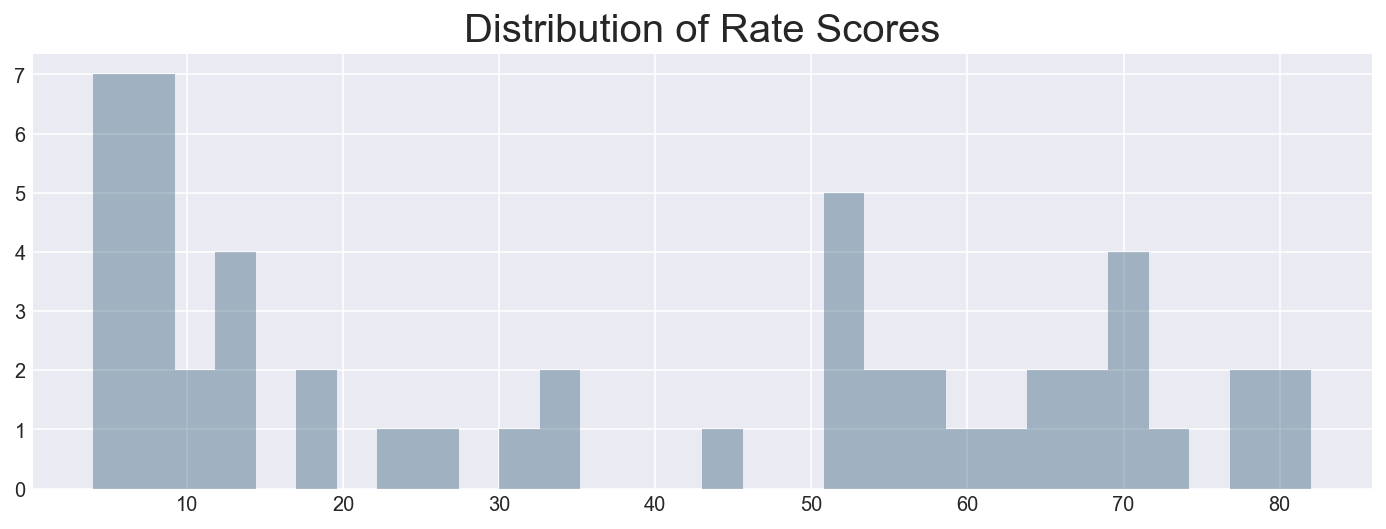

In [7]:
# Add matplotlib & seaborn to project
sns.set_style('darkgrid')

ss_rate = df_sat_score.Rate.values

fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.distplot(ss_rate,bins=30,kde=False);
ax.set_title("Distribution of Rate Scores", fontsize=20)
plt.show()

C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


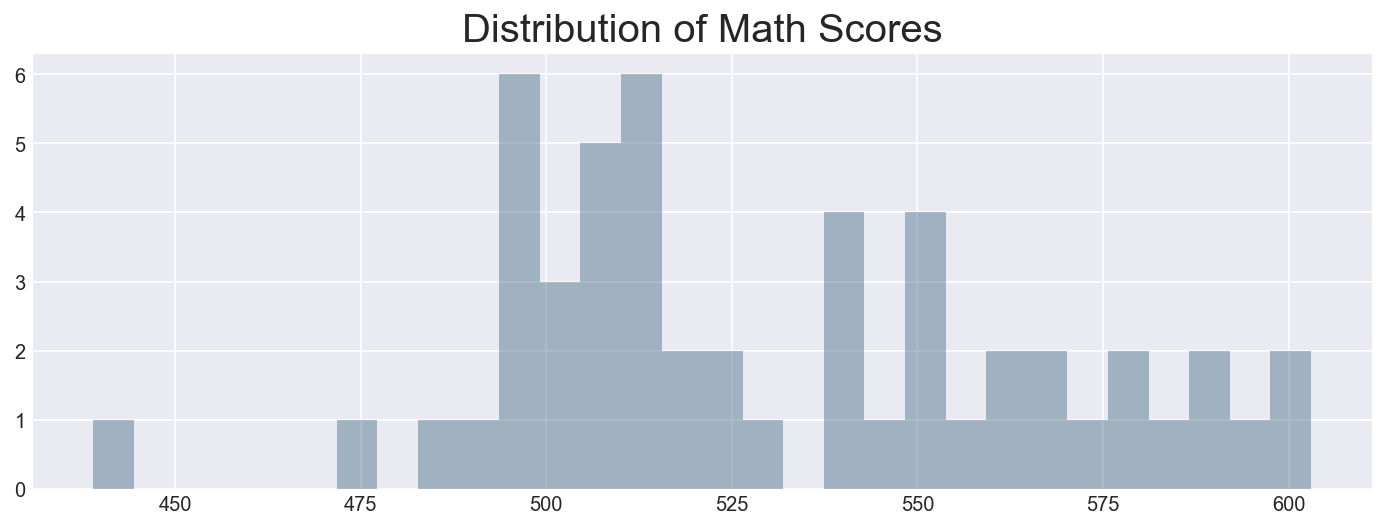

In [8]:
ss_math = df_sat_score.Math.values

fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.distplot(ss_math, bins=30, kde=False)
ax.set_title("Distribution of Math Scores", fontsize=20)
plt.show()

C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


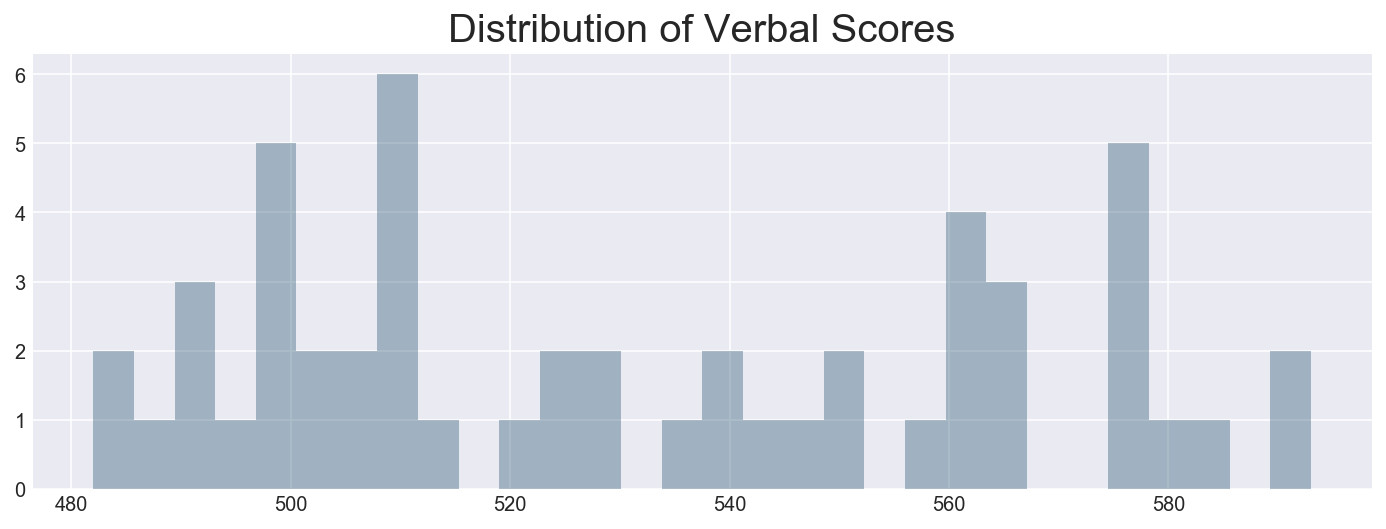

In [9]:
ss_verbal = df_sat_score.Verbal.values

fig = plt.figure(figsize=(12,4))
ax = fig.gca()

ax = sns.distplot(ss_verbal, bins=30, kde=False)
ax.set_title("Distribution of Verbal Scores", fontsize=20)
plt.show()

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

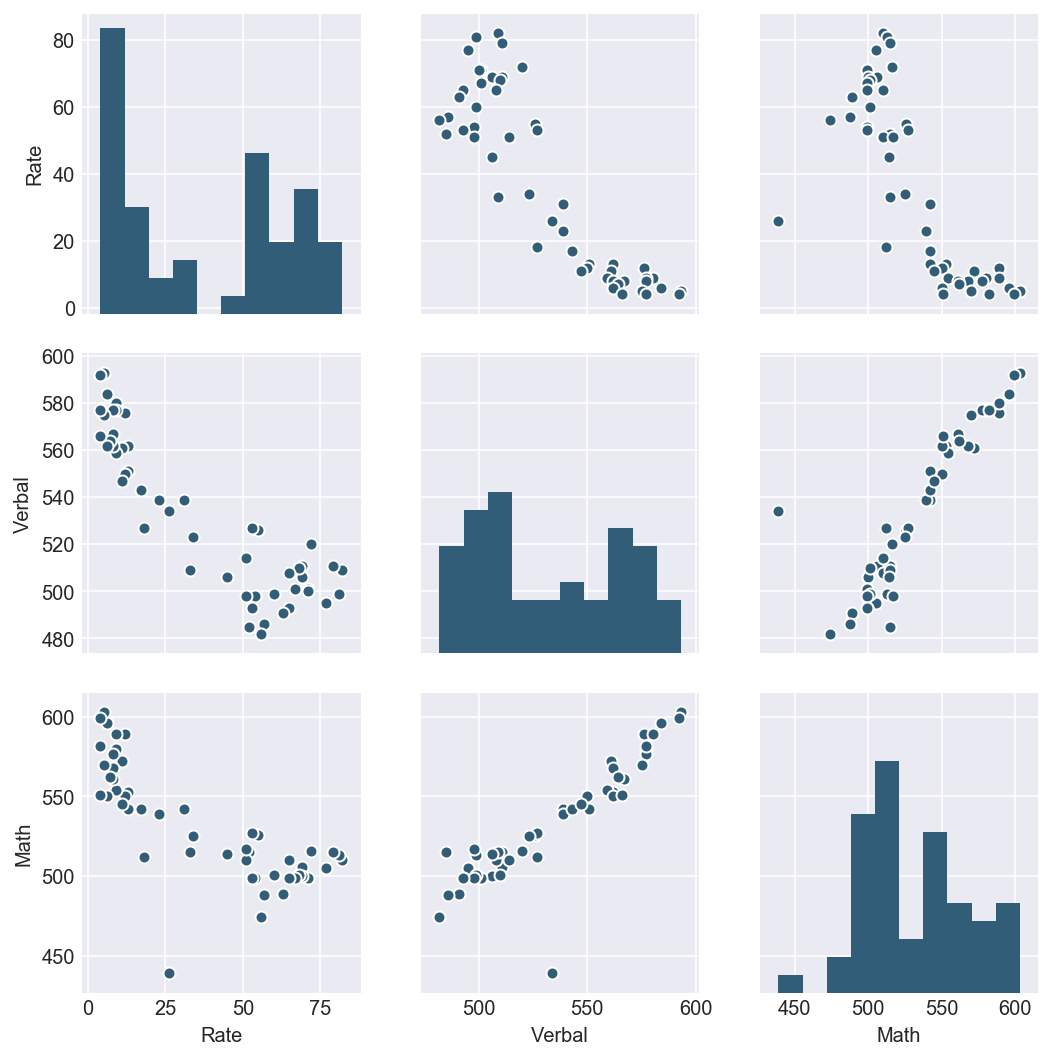

In [10]:
# Plotting by using pairplot
ss_pairplot = sns.pairplot(df_sat_score)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

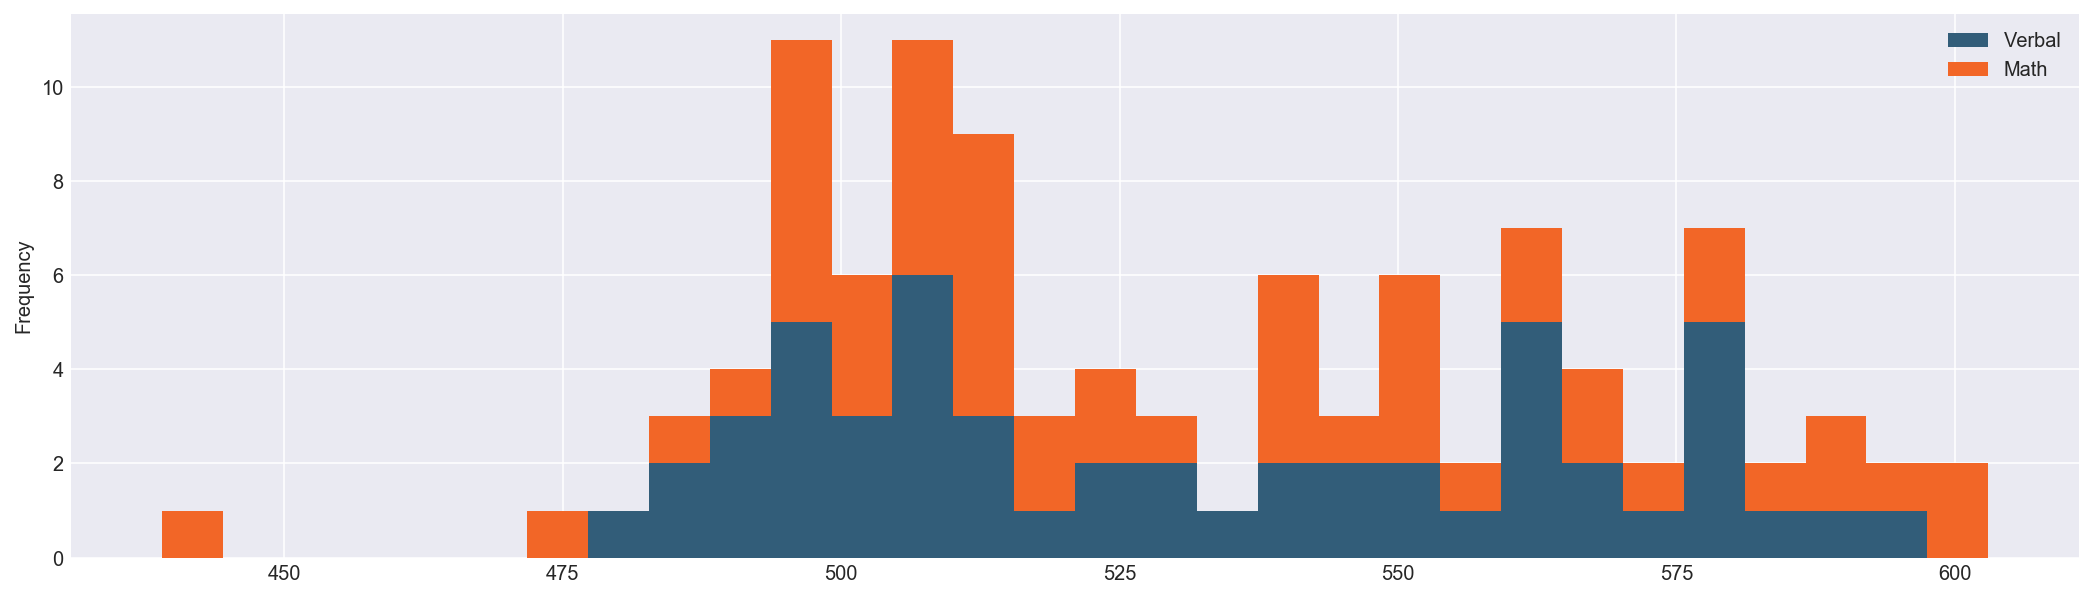

In [11]:
pandas_verbal_math = df_sat_score[['Verbal','Math']]

pandas_verbal_math.plot(kind='hist',bins=30,figsize=(18,5),stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

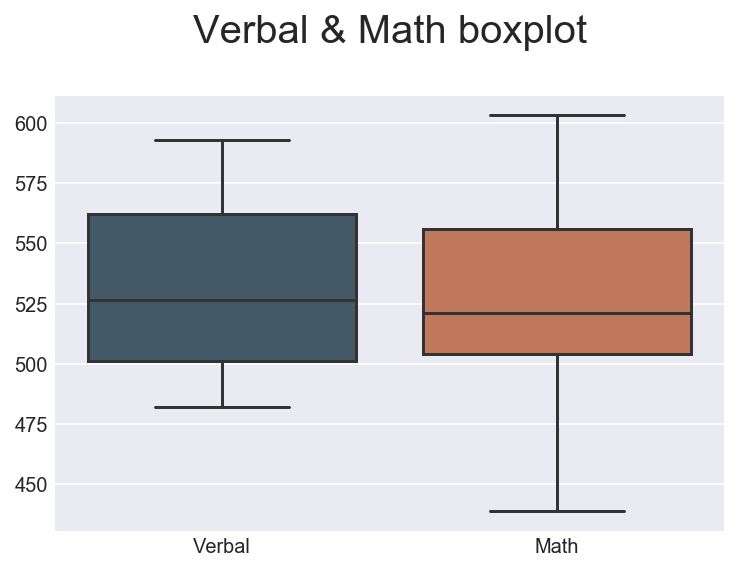

In [12]:
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

sns.boxplot(data=pandas_verbal_math, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('Verbal & Math boxplot\n', fontsize=20)

plt.show()

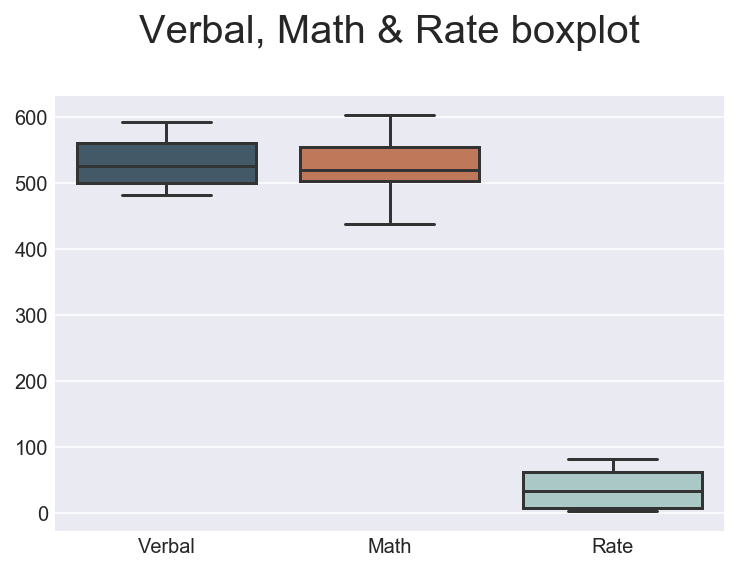

In [13]:
# What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

pandas_verbal_math_rate = df_sat_score[['Verbal','Math','Rate']]


sns.boxplot(data=pandas_verbal_math_rate, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('Verbal, Math & Rate boxplot\n', fontsize=20)
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


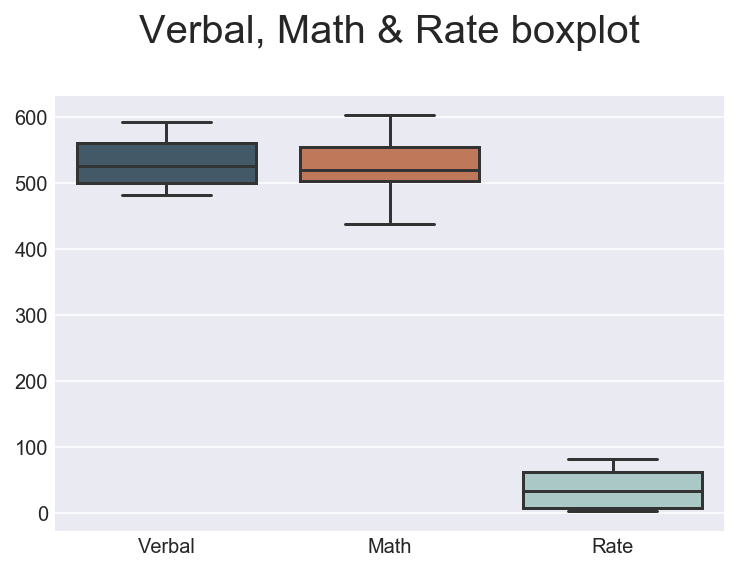

In [14]:
# Plotting all SAT score by using boxplot.
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

pandas_verbal_math_rate = df_sat_score[['Verbal','Math','Rate']]


sns.boxplot(data=pandas_verbal_math_rate, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('Verbal, Math & Rate boxplot\n', fontsize=20)
plt.show()


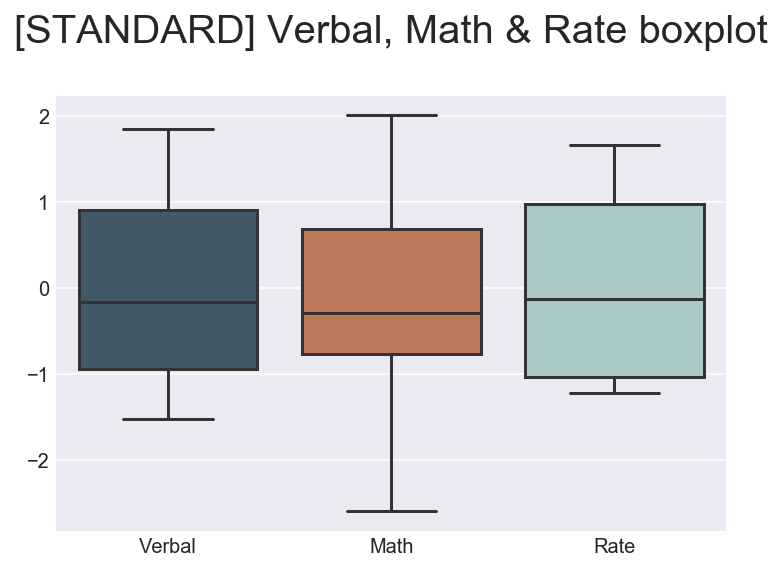

In [15]:
# Standard Verbal, Math & Rate column
standard_scores = (pandas_verbal_math_rate - np.mean(pandas_verbal_math_rate))/ np.std(pandas_verbal_math_rate)

# boxplot after standard all columns
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

sns.boxplot(data=standard_scores, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)
ax.set_title('[STANDARD] Verbal, Math & Rate boxplot\n', fontsize=20)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [16]:
# Get Verbal Series
series_Verbal = df_sat_score['Verbal'].values

# Find the average of Verbal score across states
avg_Verbal = np.mean(series_Verbal)
print(avg_Verbal)

# return dataframe which has the Verbal's score larger than the average.
df_lger_avg_verbal = df_sat_score[df_sat_score['Verbal'] > avg_Verbal]
df_lger_avg_verbal.shape

532.0192307692307


(24, 4)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [17]:
# Find the median of Verbal score across states
med_Verbal = np.median(series_Verbal)
print(med_Verbal)

# return dataframe which has the Verbal's score greater than the median
df_gt_med_verbal = df_sat_score[df_sat_score['Verbal'] > med_Verbal]
df_gt_med_verbal.shape

526.5


(26, 4)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [18]:
# Calculate the different between Verbal & Math score.
df_sat_score['diff_Verbal_Math'] = df_sat_score.apply(lambda row: row['Verbal'] - row['Math'],axis=1)
df_sat_score.head()

,State,Rate,Verbal,Math,diff_Verbal_Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [19]:
# dataframe with the greatest gap btw Verbal & Math
df_sat_score.head()

# Sorted Out 'diff_Verbal_Math' column from highest to lowest
df_gt_gap_verbal_math = df_sat_score.sort_values(by=['diff_Verbal_Math'],ascending=False)

# Output to 1st dataframe include first 10 states where Verbal is greater than Math
df_gt_gap_verbal_math = df_gt_gap_verbal_math.head(num)

df_gt_gap_verbal_math.head(3)

,State,Rate,Verbal,Math,diff_Verbal_Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [20]:
# Sorted Out 'diff_Verbal_Math' column from highest to lowest
df_ins_gap_verbal_math = df_sat_score.sort_values(by=['diff_Verbal_Math'],ascending=True)

# Output to 2nd dataframe include last 10 states where Math is greater than Verbal
df_ins_gap_verbal_math = df_ins_gap_verbal_math.head(num)

df_ins_gap_verbal_math.head(3)

,State,Rate,Verbal,Math,diff_Verbal_Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


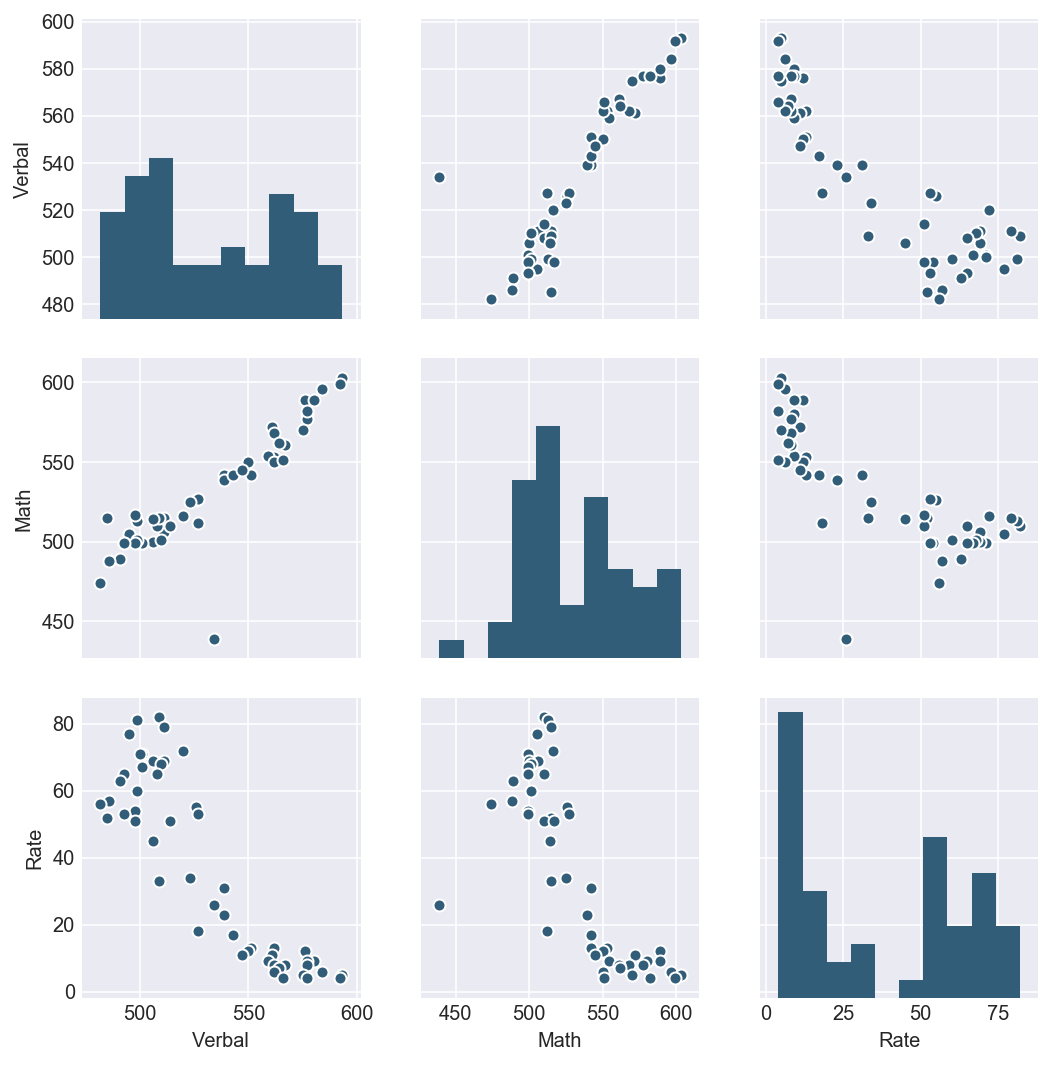

In [21]:
# Plotting SAT score by using pairplot.
sns.pairplot(pandas_verbal_math_rate)

In [22]:
# Calculate the correlation
corr_sat_score = pandas_verbal_math_rate.corr()
corr_sat_score

,Verbal,Math,Rate
Verbal,1.000000,0.899871,-0.886432
Math,0.899871,1.000000,-0.773746
Rate,-0.886432,-0.773746,1.000000


## Desciptions:
- 'Math' & 'Verbal' columns have the most strong positive relationship which is 0.899871
- 'Verbal' & 'Rate' columns have strongly negative relationship which is 0.886432
- Meanwhile, 'Rate' & 'Math' columns still have strong negative relationship but less than the relationship of 'Verbal' & 'Rate'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [23]:
# Describe Verbal & Math Rate.
pandas_verbal_math_rate.describe().T

,count,mean,std,min,25%,50%,75%,max
Verbal,52.0,532.019231,33.236225,482.0,501.0,526.5,562.00,593.0
Math,52.0,531.500000,36.014975,439.0,504.0,521.0,555.75,603.0
Rate,52.0,37.153846,27.301788,4.0,9.0,33.5,63.50,82.0


### Count:
- Total amount of rows for each column within dataframe
- These columns have same amount of 52.

### Mean:
- Mean value of each numberic column
- It is represented in float

### Std:
- Standard devitation of each numberic column
- It is presented in float

### Min:
- Minimum value of each numberic column

### 25%:
- The first quantile

### 50%:
- The second quantile or the median

### 75%:
- The third quantile

### Max:
- Maximum value of each numberic column

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [24]:
# 1. Describe how the covariance matrix is different from the correlation matrix.
pandas_verbal_math_rate.cov()

,Verbal,Math,Rate
Verbal,1104.646682,1077.147059,-804.355958
Math,1077.147059,1297.078431,-760.803922
Rate,-804.355958,-760.803922,745.387632


#### 2. What is the process to convert the covariance into the correlation?
- Step 1: Calculate the covariance
- Step 2: Apply the formular $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

#### 3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?
- 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [25]:
# Use pandas to load dataset, named drug use by age.
df_drug_use_by_age = pd.read_csv('./drug-use-by-age.csv')

df_drug_use_by_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

#### Does this data require cleaning? Are variables missing?
- ANSWER: yes, because some columns name which are supported to be numberic (float64, int64) but their info are saying object

#### How will this affect your approach to EDA on the data?
- ANSWER: will affect our data if approaching EDA since the data is small, less than 17

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [26]:
# Show head of dataframe
df_drug_use_by_age.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [27]:
# define function remove character of "-"
def remove_hypens(target):
    str_len = len(target)
    
    # target range value. Example: 3-9 will return 6
    if str_len > 2 and target.find("-"):
        i_ = target.find("-")
        b_ = target[0:i_]
        a_ = target[i_+1:str_len]
        
        sum = int(a_) + int(b_)
    
        return sum/2
    # target character "-" itself. Example: return    
    elif str_len == 1 and target.find("-") == 0:
        return 0
    elif str_len == 1 and target.find("+"):
        target = target[0:1]
        return target
    return target

In [28]:
# Cleaning AGE column
## Special case for "65+"
df_drug_use_by_age['age'].iloc[-1] = 65

## General case 
df_drug_use_by_age['age'] = df_drug_use_by_age['age'].apply(lambda row: remove_hypens(row) if len(str(row)) >= 3 and str(row).find("-") else float(row))
df_drug_use_by_age['age'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. , 22.5,
       24.5, 27.5, 32. , 42. , 57. , 65. ])

In [29]:
# Cleaning COCAINE-FEQ column
df_drug_use_by_age['cocaine-frequency'].iloc[-1] = 0
df_drug_use_by_age['cocaine-frequency'] = df_drug_use_by_age['cocaine-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['cocaine-frequency'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([ 5. ,  1. ,  5.5,  4. ,  7. ,  8. ,  6. , 15. , 36. ,  0. ])

In [30]:
# Cleaning CRACK-FEQ column
df_drug_use_by_age['crack-frequency'] = df_drug_use_by_age['crack-frequency'].apply(lambda row: 0 if "-" in row else row)
df_drug_use_by_age['crack-frequency'] = df_drug_use_by_age['crack-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['crack-frequency'].unique()

array([ 0. ,  3. ,  9.5,  1. , 21. , 10. ,  2. ,  5. , 17. ,  6. , 15. ,
       48. , 62. ])

In [31]:
# Cleaning HEROIN-FEQ column
df_drug_use_by_age['heroin-frequency'].iloc[1] = 0
df_drug_use_by_age['heroin-frequency'] = df_drug_use_by_age['heroin-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['heroin-frequency'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([ 35.5,   0. ,   2. ,   1. ,  66.5,  64. ,  46. , 180. ,  45. ,
        30. ,  57.5,  88. ,  50. ,  66. , 280. ,  41. , 120. ])

In [32]:
# Cleaning INHALANT-FEQ column
df_drug_use_by_age['inhalant-frequency'].iloc[-1] = 0
df_drug_use_by_age['inhalant-frequency'] = df_drug_use_by_age['inhalant-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['inhalant-frequency'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([19. , 12. ,  5. ,  5.5,  3. ,  4. ,  2. ,  3.5, 10. , 13.5,  0. ])

In [33]:
# Cleaning OXYCONTIN-FEQ column
df_drug_use_by_age['oxycontin-frequency'].iloc[-1] = 0
df_drug_use_by_age['oxycontin-frequency'] = df_drug_use_by_age['oxycontin-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['oxycontin-frequency'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([24.5, 41. ,  4.5,  3. ,  4. ,  6. ,  7. ,  7.5, 12. , 13.5, 17.5,
       20. , 46. ,  5. ,  0. ])

In [34]:
# Cleaning METH-FEQ column
df_drug_use_by_age['meth-frequency'].iloc[0] = 0
df_drug_use_by_age['meth-frequency'].iloc[-1] = 0
df_drug_use_by_age['meth-frequency'] = df_drug_use_by_age['meth-frequency'].apply(lambda row:  float(row))
df_drug_use_by_age['meth-frequency'].unique()

C:\Users\Shaynie\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


array([  0. ,   5. ,  24. ,  10.5,  36. ,  48. ,  12. , 105. ,   2. ,
        46. ,  21. ,  30. ,  54. , 104. ])

In [35]:
# Split Drug Dataframe into 2 sub Dataframes which are:
## Dataframe of Drug in use
df_drug_in_use = df_drug_use_by_age[['age','alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]

## Dataframe of Drut in frequency
df_drug_in_freq = df_drug_use_by_age[['age','alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

### Drug IN Use


In [36]:
df_drug_in_use.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17.0,25.617647,15.356726,12.0,16.0,20.0,27.5,65.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1
hallucinogen-use,17.0,3.394118,2.792506,0.1,0.6,3.2,5.2,8.6
inhalant-use,17.0,1.388235,0.927283,0.0,0.6,1.4,2.0,3.0
pain-releiver-use,17.0,6.270588,3.166379,0.6,3.9,6.2,9.0,10.0
oxycontin-use,17.0,0.935294,0.608216,0.0,0.4,1.1,1.4,1.7


Text(0,0.5,'Percentage')

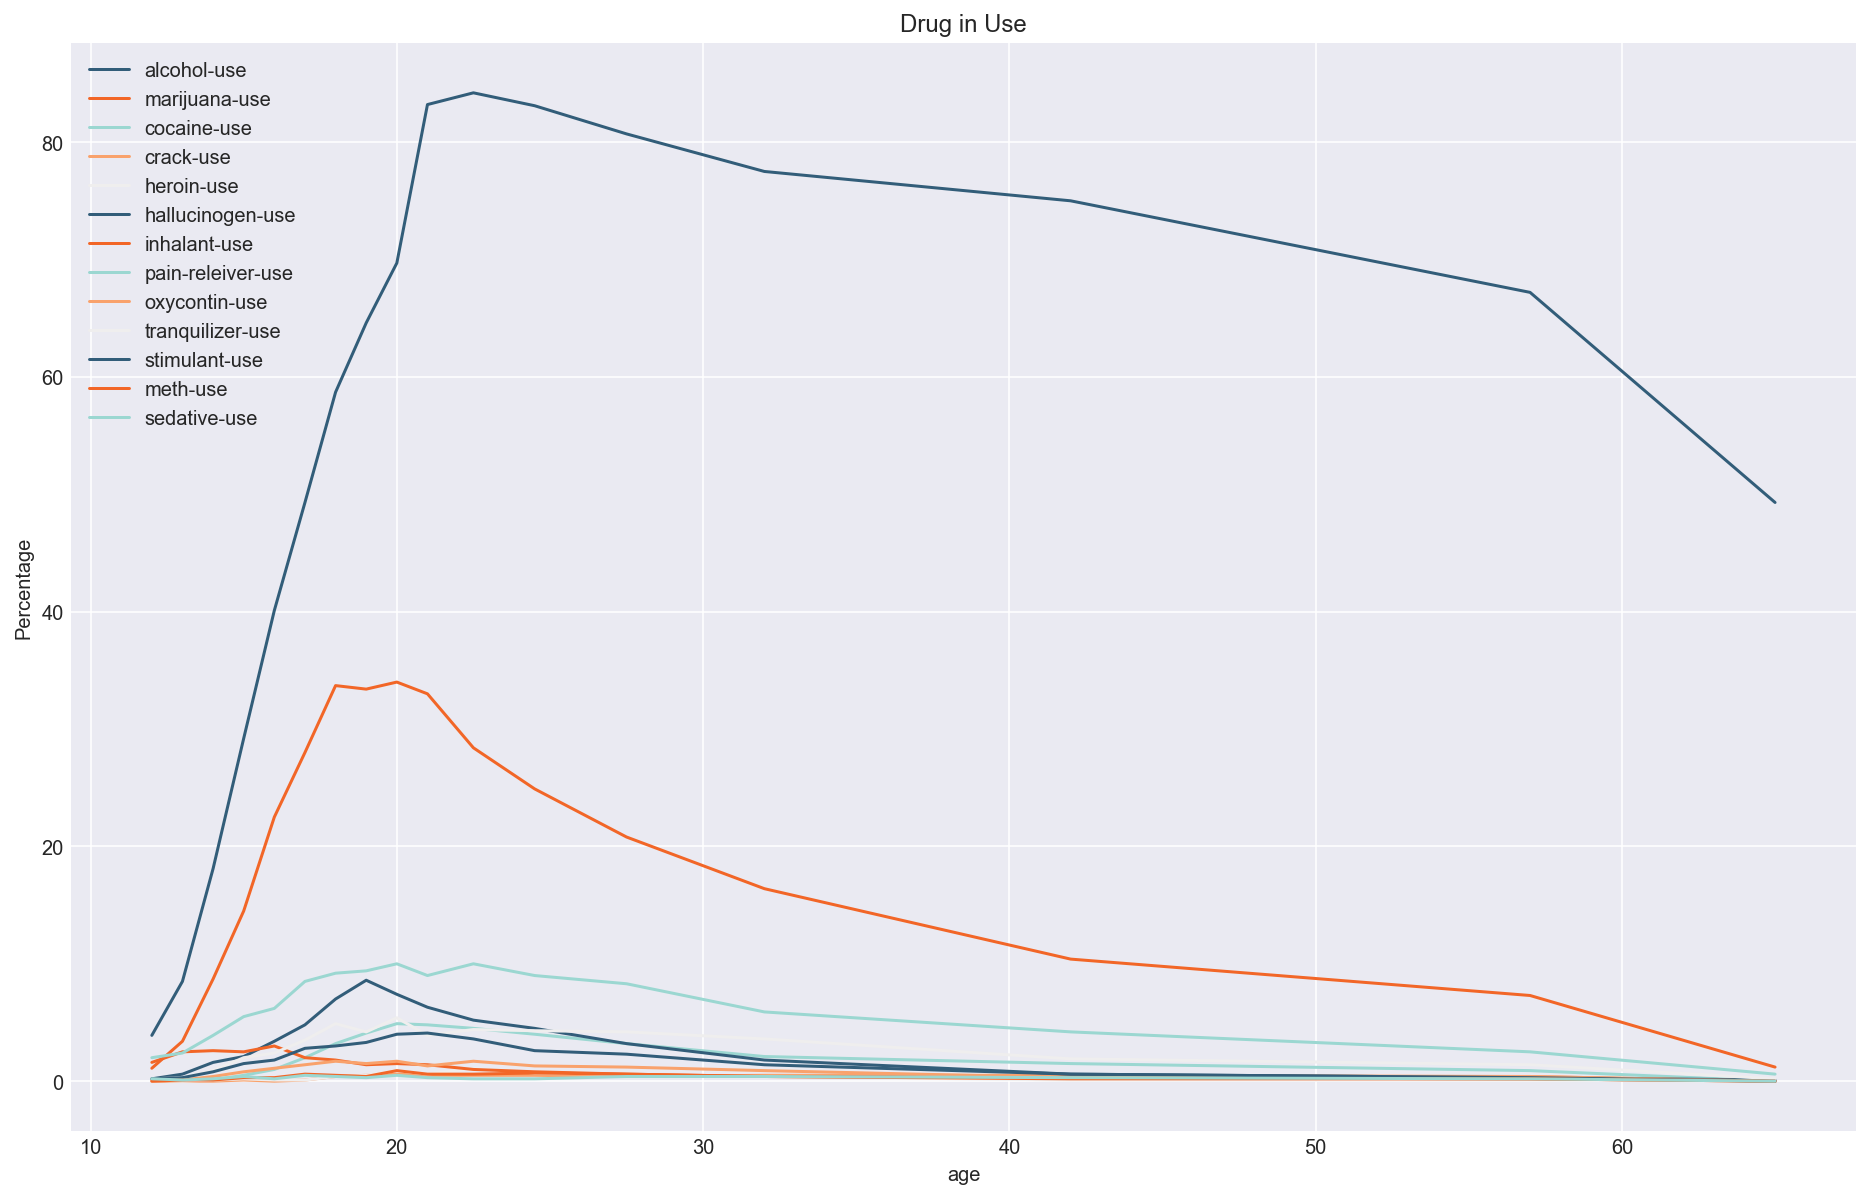

In [37]:
# Plot
df_temp_no_age  = df_drug_in_use[['alcohol-use','marijuana-use','cocaine-use','crack-use','heroin-use','hallucinogen-use','inhalant-use','pain-releiver-use','oxycontin-use','tranquilizer-use','stimulant-use','meth-use','sedative-use']]
ax = df_drug_in_use.plot.line(figsize=(16,10), title='Drug in Use',x='age')
ax.set_ylabel("Percentage")

### Description:
- "Alcohol-use" & "Marijuana-use" are mostly dominated the percentate which are above 40% and 20%, respectively.
- About 5 drugs in use has percentage above 5% which are:
    - "Pain-releiver-use"
    - "Hallucinogen-use"
    - "Tranquilizer-use"
    - "Sedative-use"
    - "Stimulant-use"

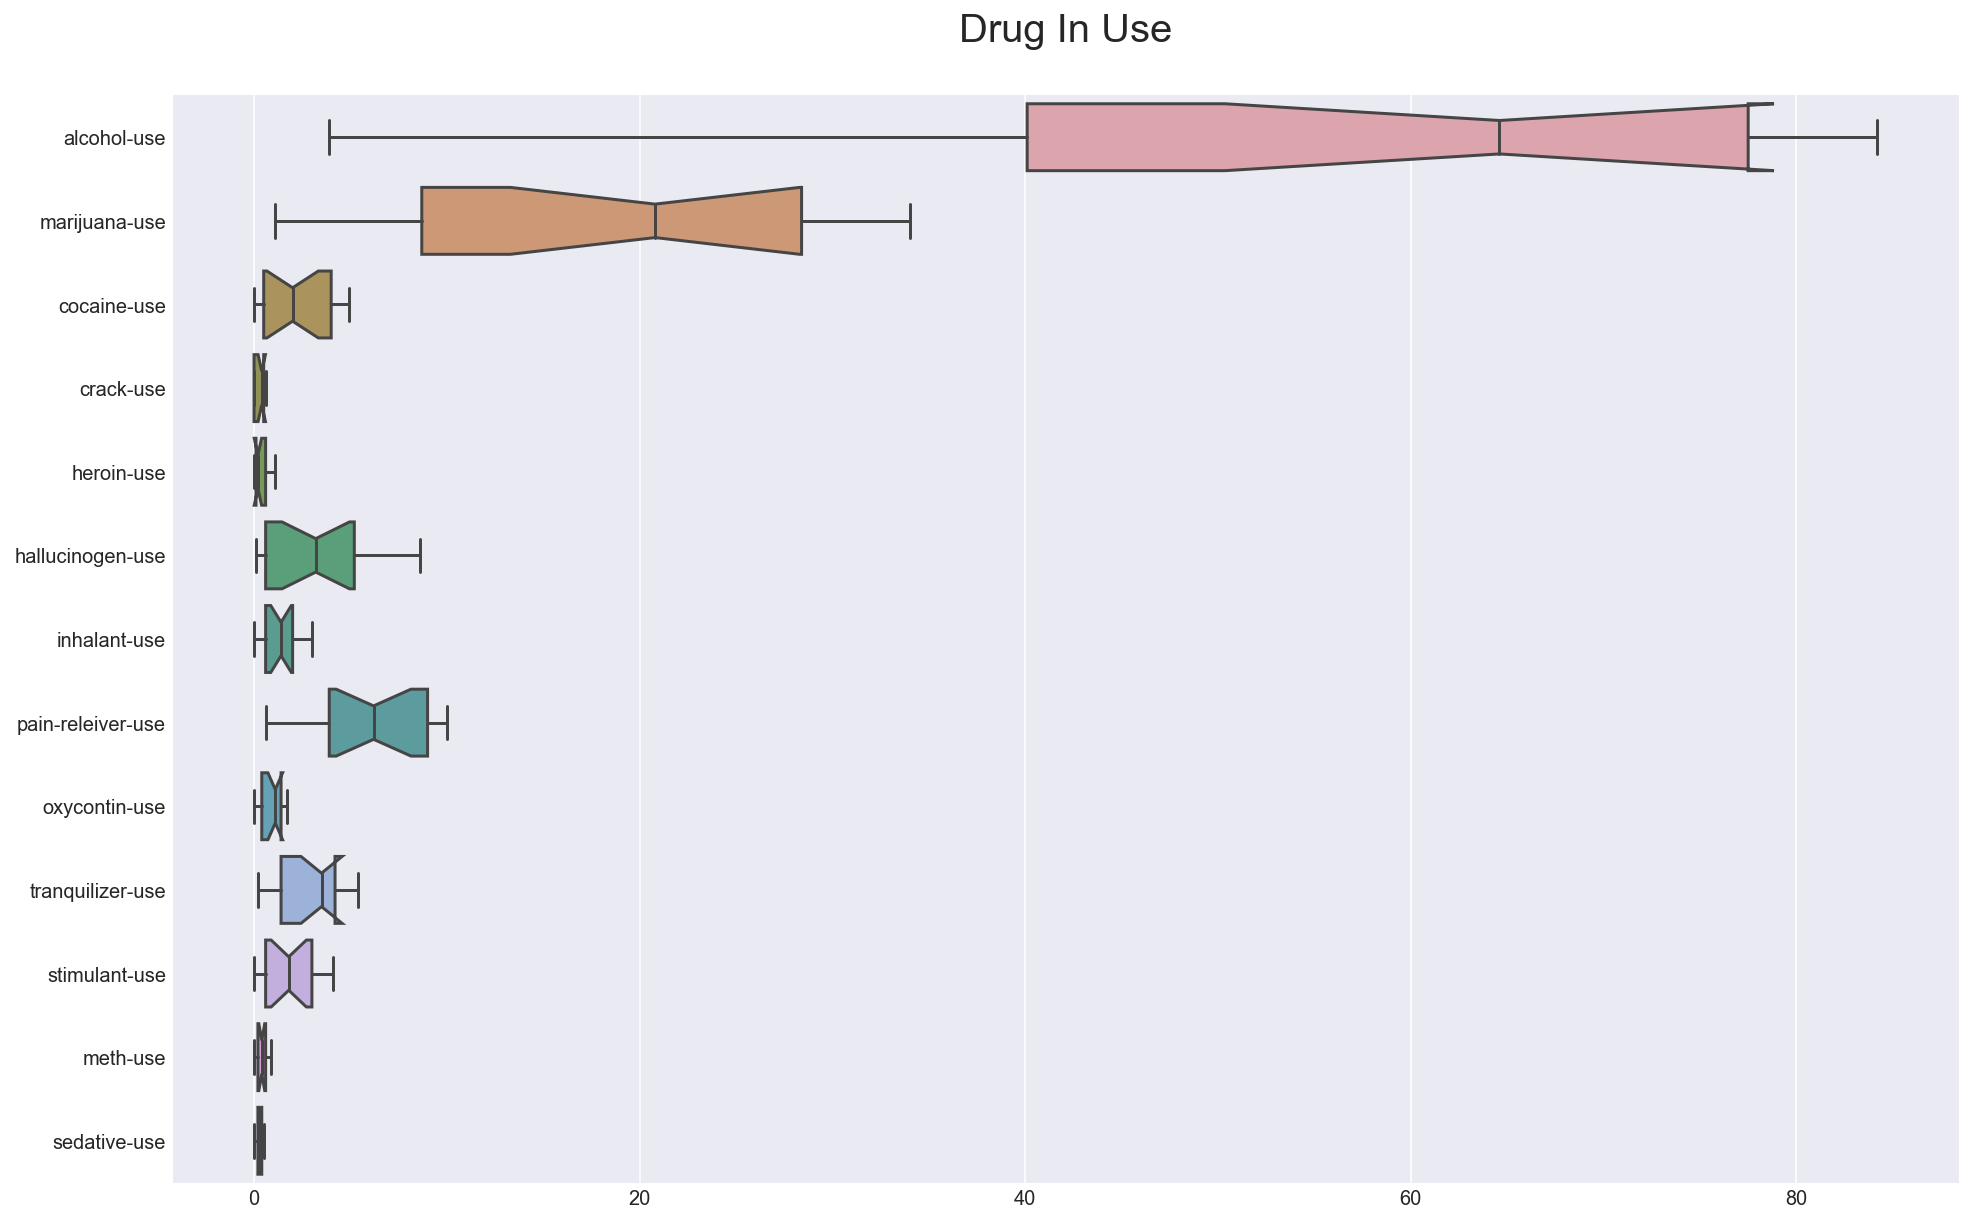

In [38]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()

sns.boxplot(data=df_temp_no_age, orient='h',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_title('Drug In Use\n', fontsize=20)

plt.show()

In [39]:
# 

In [40]:
# Picking Top 5 Drugs in use
drug_top_5 = df_drug_in_use[['alcohol-use','marijuana-use','cocaine-use','hallucinogen-use','pain-releiver-use']]

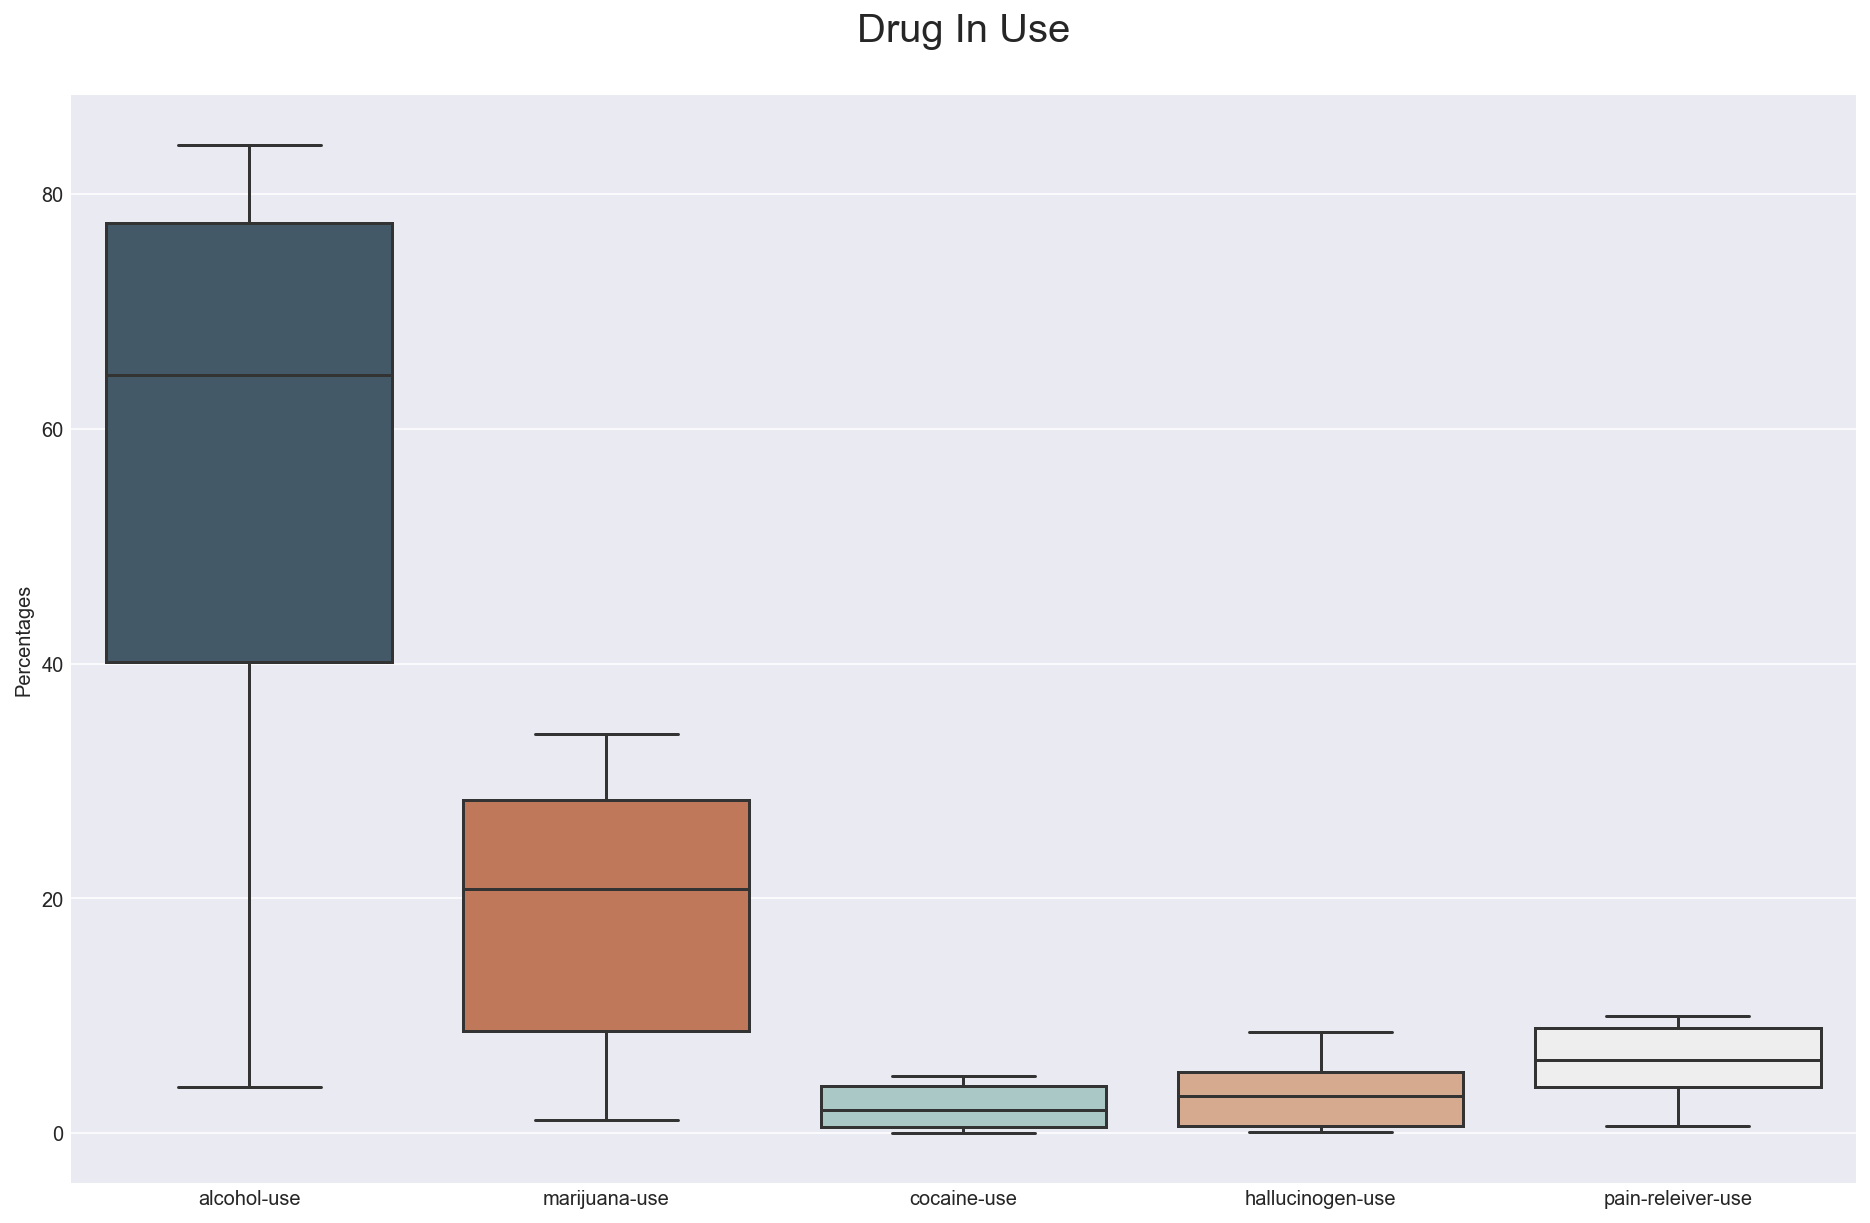

In [41]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()

sns.boxplot(data=drug_top_5, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)

ax.set_title('Drug In Use\n', fontsize=20)
ax.set_ylabel("Percentages")

plt.show()

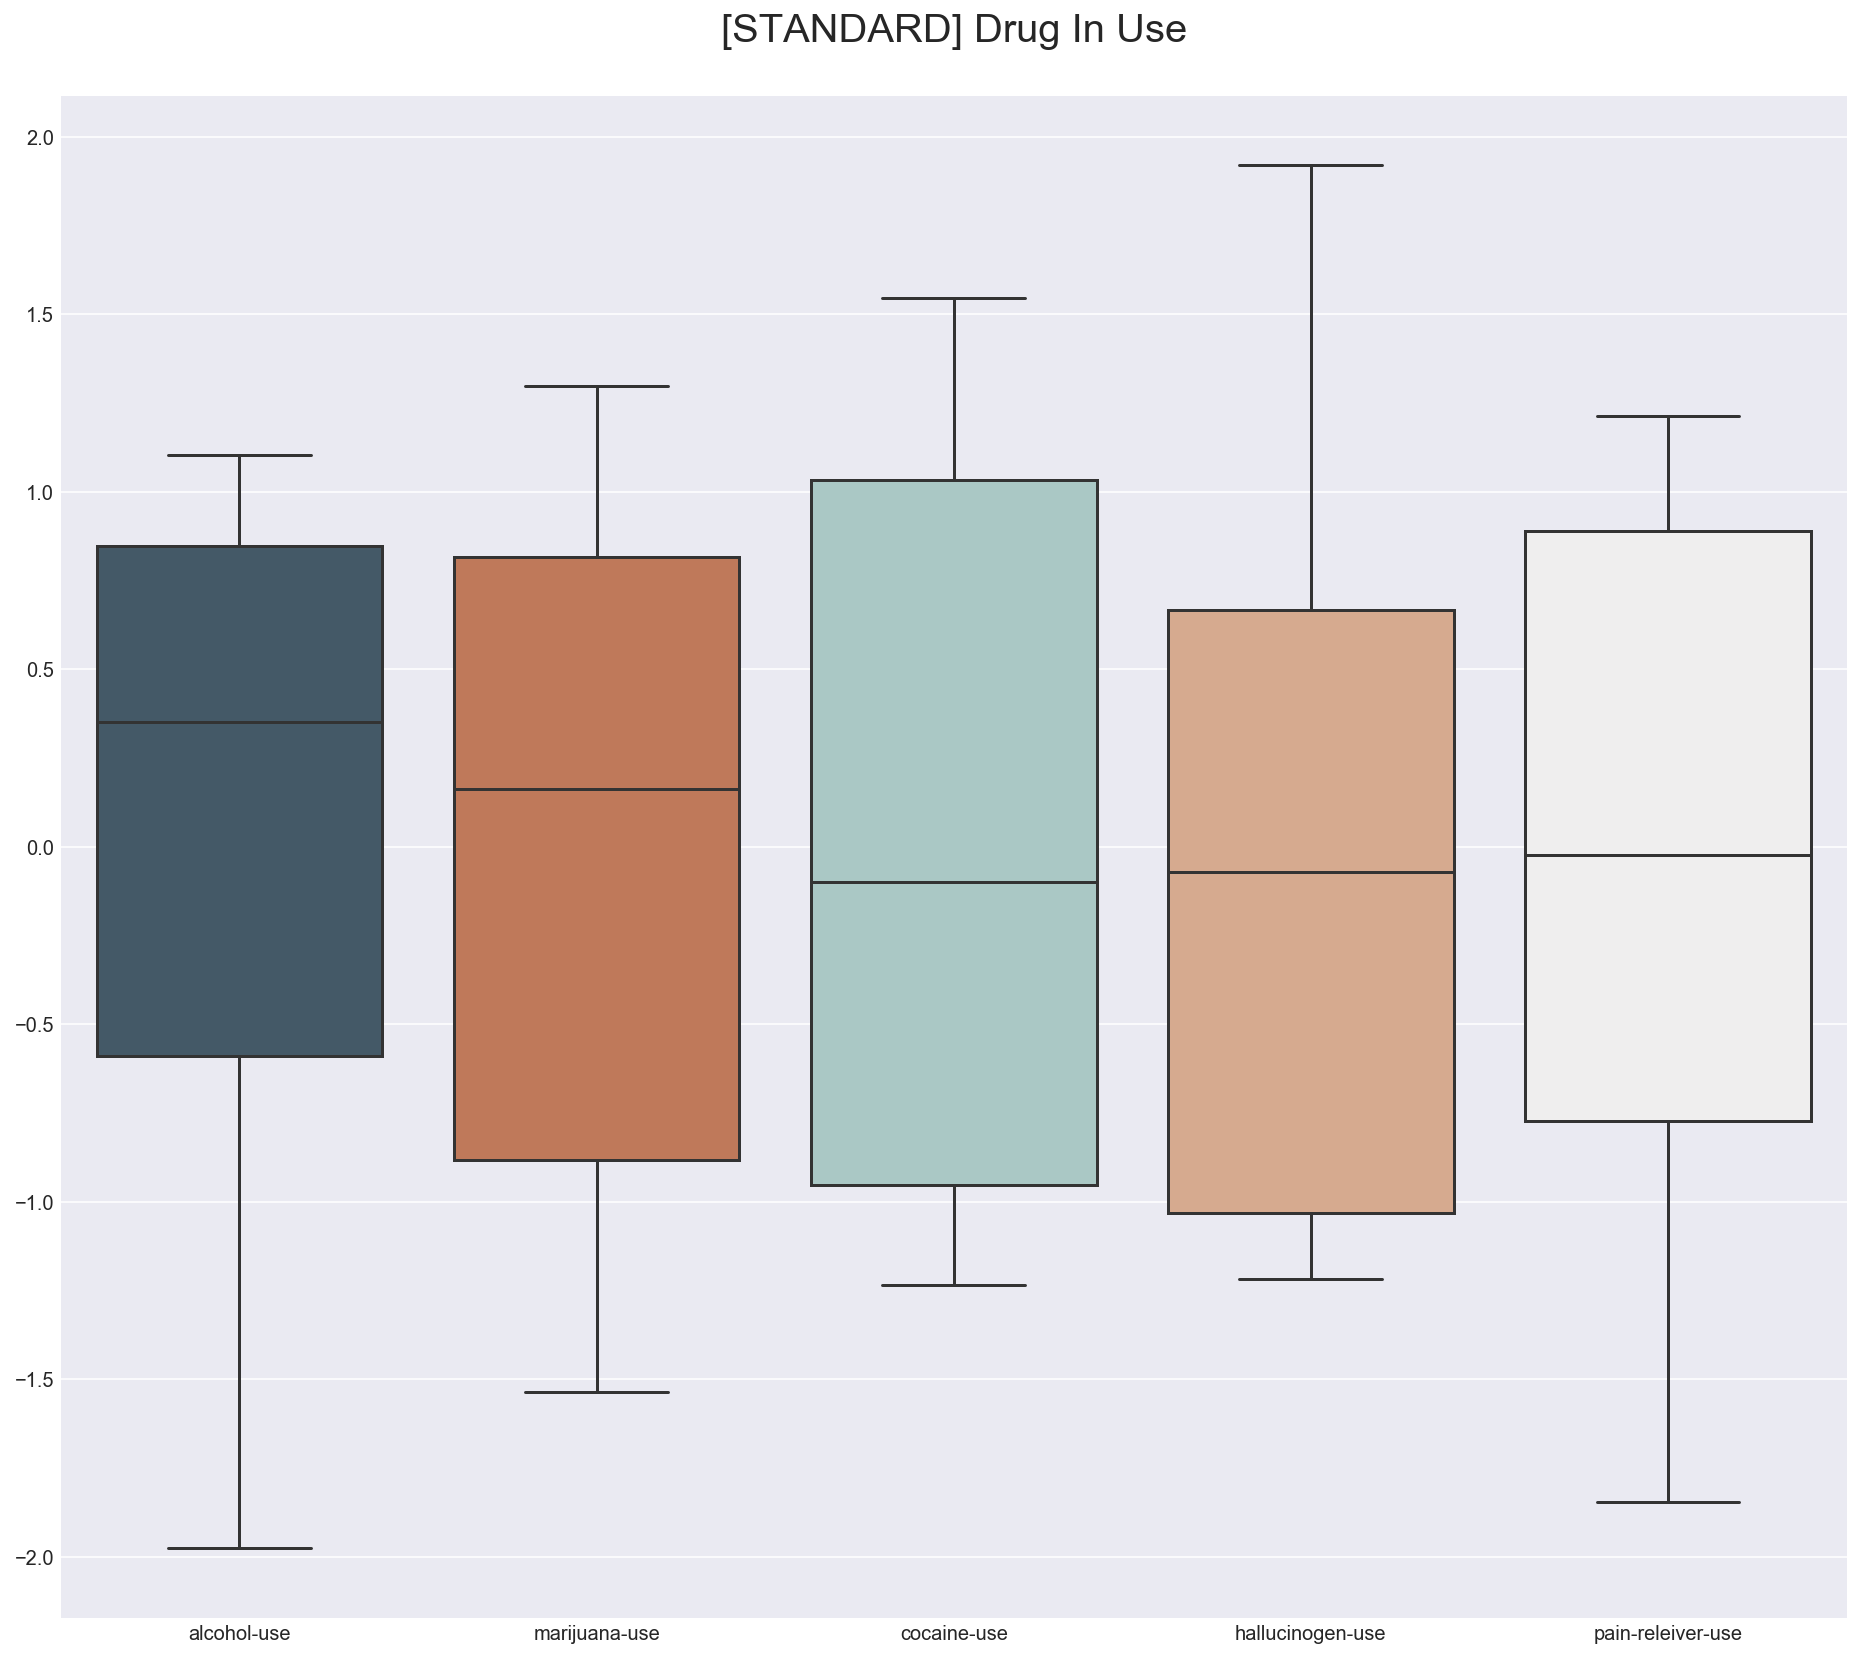

In [42]:
# Standard Verbal, Math & Rate column
standard_drug_in_use = (drug_top_5 - np.mean(drug_top_5))/ np.std(drug_top_5)

# boxplot after standard all columns
fig = plt.figure(figsize=(16,14))
ax = fig.gca()

sns.boxplot(data=standard_drug_in_use, orient='v',
                fliersize=8, linewidth=1.5, notch=False,
                saturation=0.5, ax=ax)
ax.set_title('[STANDARD] Drug In Use\n', fontsize=20)
plt.show()

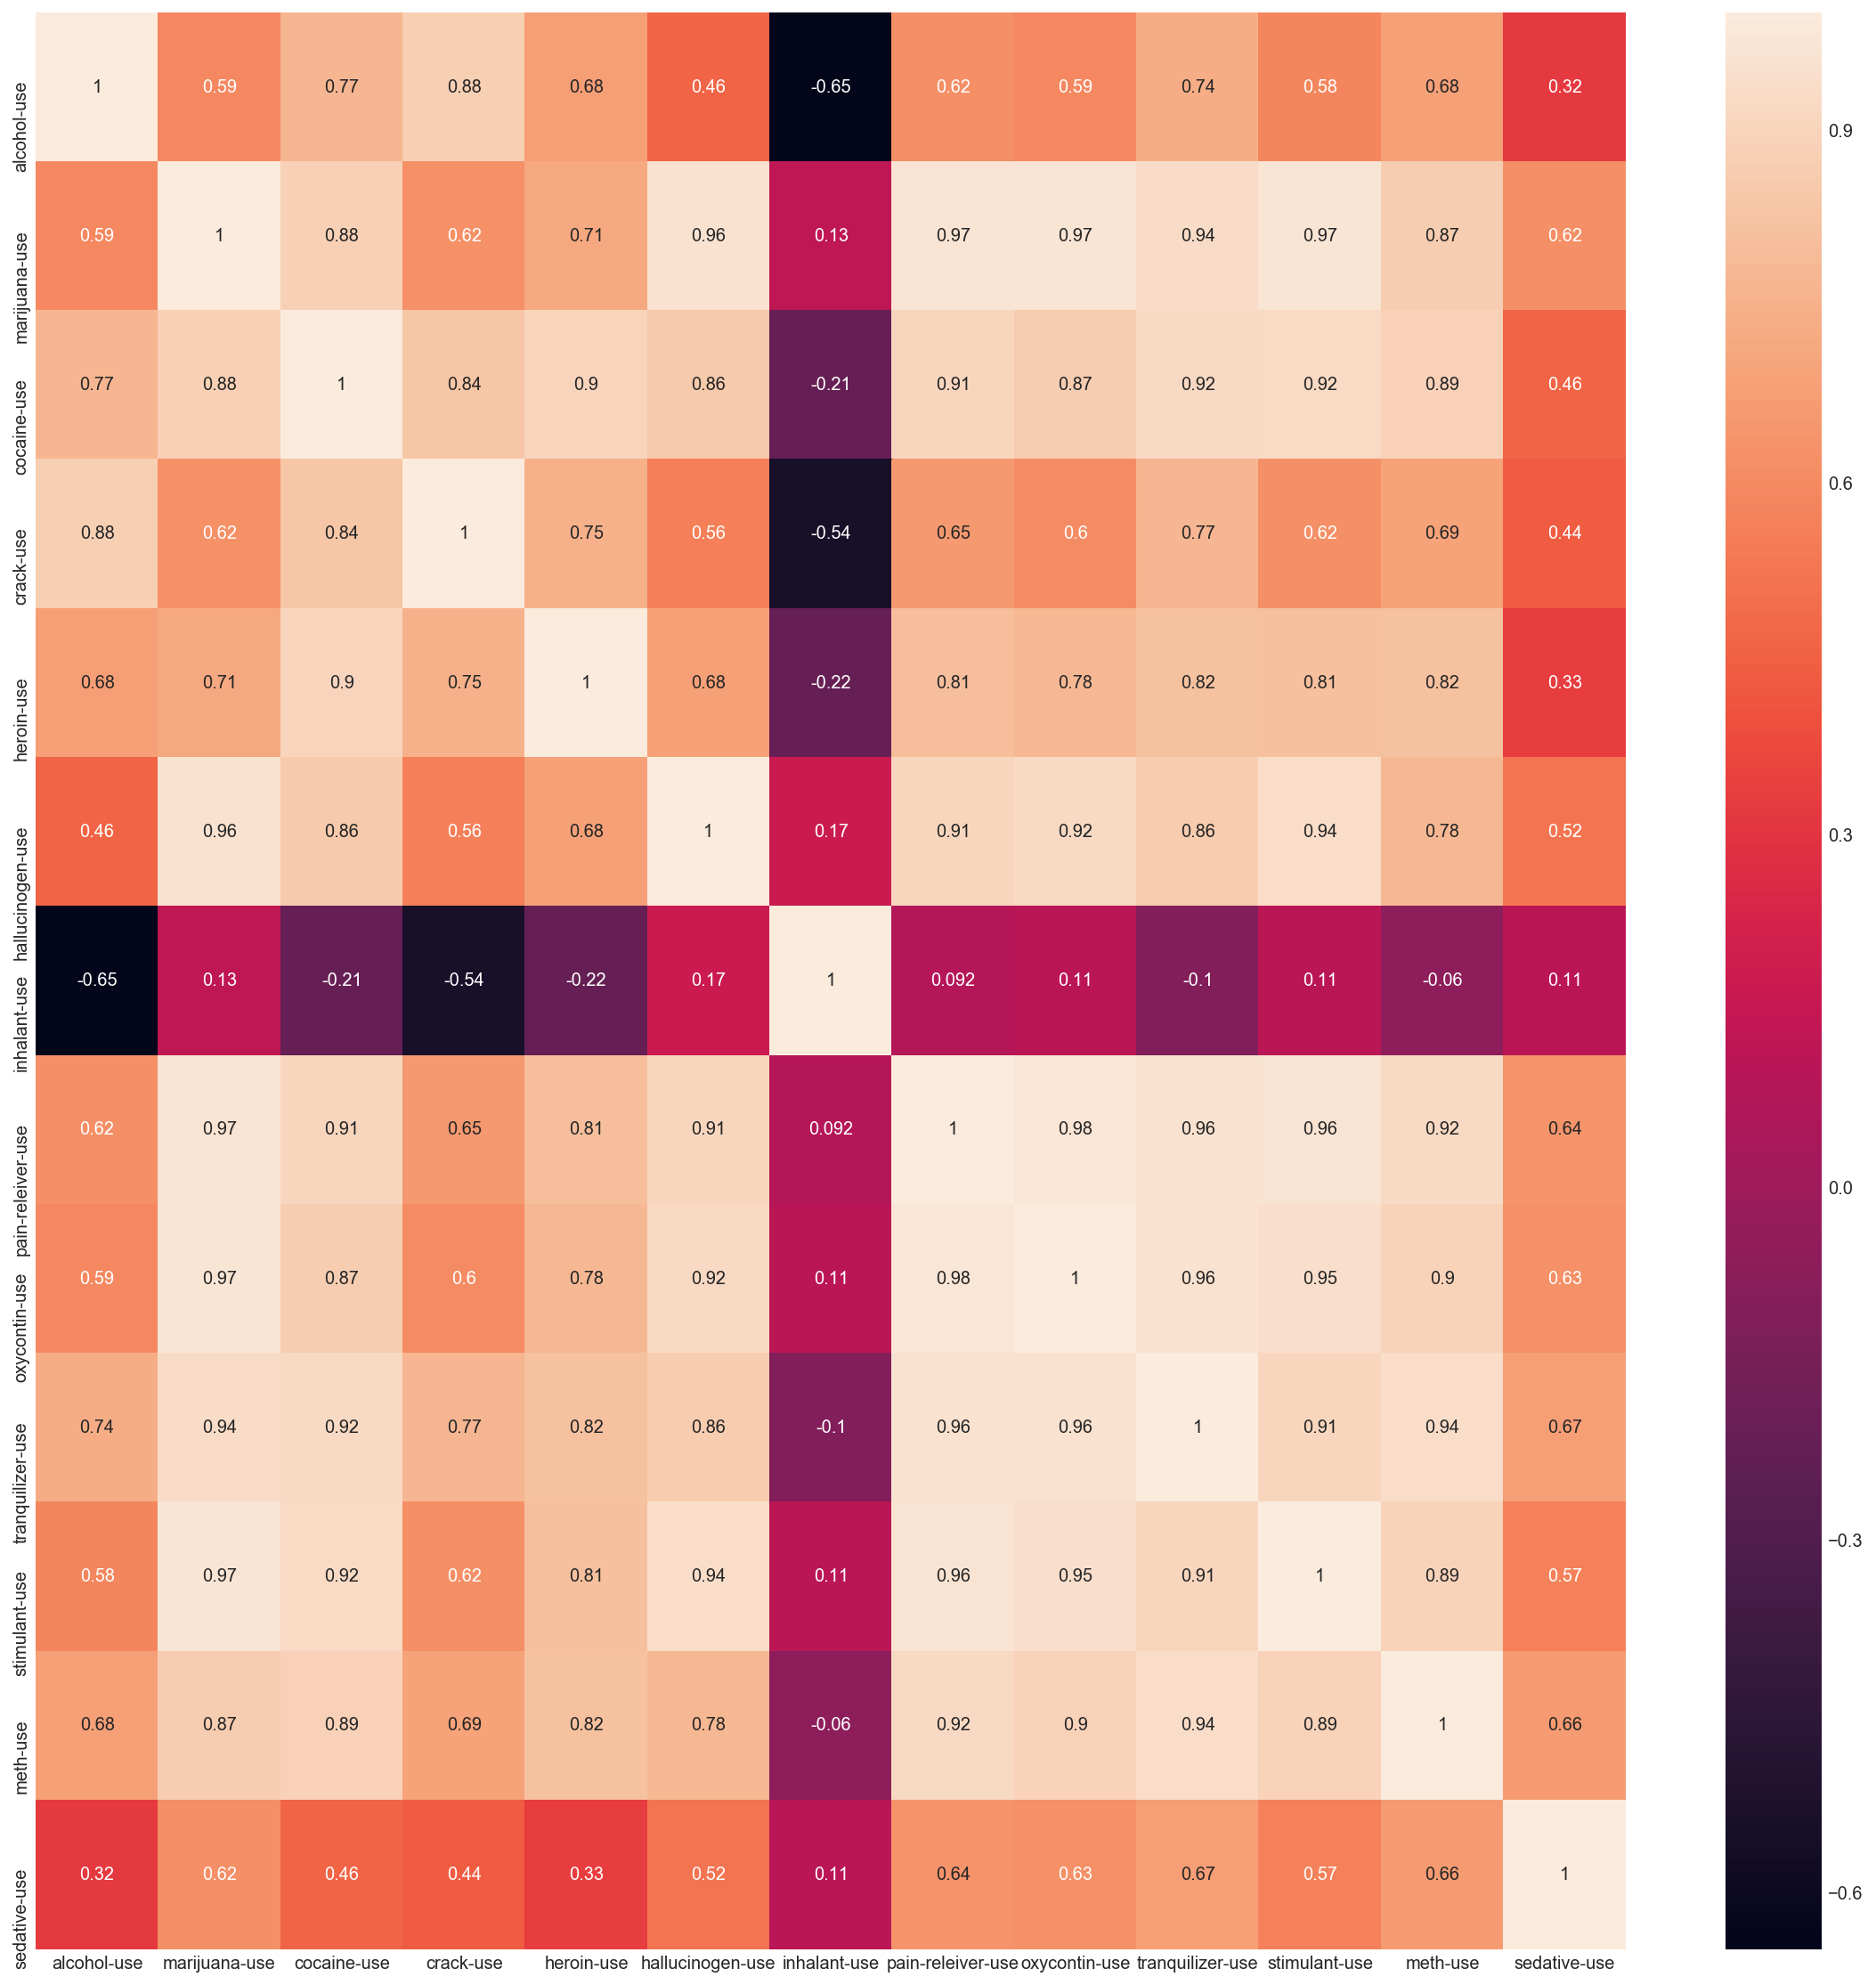

In [43]:
# Create Heatmap to see the correlations
plt.figure(figsize=(20,20))
sns.heatmap(df_temp_no_age.corr(), annot=True)

### According to these viz above
- Overal heatmap is in range of -0.6 to 0.95
- Top 5 Drugs in use will be 'alcohol-use','marijuana-use','cocaine-use','hallucinogen-use','pain-releiver-use'
- Most of top drug in use has negative which means skewed left.
- Inhalant-use likely has negative relation correlations with other drugs

### DRUG IN FEQUENCE

In [44]:
# Describle Drug accordingly to its frequence.
df_drug_in_freq.describe().T

,count,mean,std,min,25%,50%,75%,max
age,17.0,25.617647,15.356726,12.0,16.0,20.0,27.5,65.0
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-frequency,17.0,68.970588,70.153285,0.0,35.5,50.0,66.5,280.0
hallucinogen-frequency,17.0,8.411765,15.000245,2.0,3.0,3.0,4.0,52.0
inhalant-frequency,17.0,5.794118,4.937291,0.0,3.0,4.0,5.5,19.0
pain-releiver-frequency,17.0,14.705882,6.935098,7.0,12.0,12.0,15.0,36.0
oxycontin-frequency,17.0,13.941176,12.902134,0.0,5.0,12.0,17.5,46.0


Text(0,0.5,'Frequency')

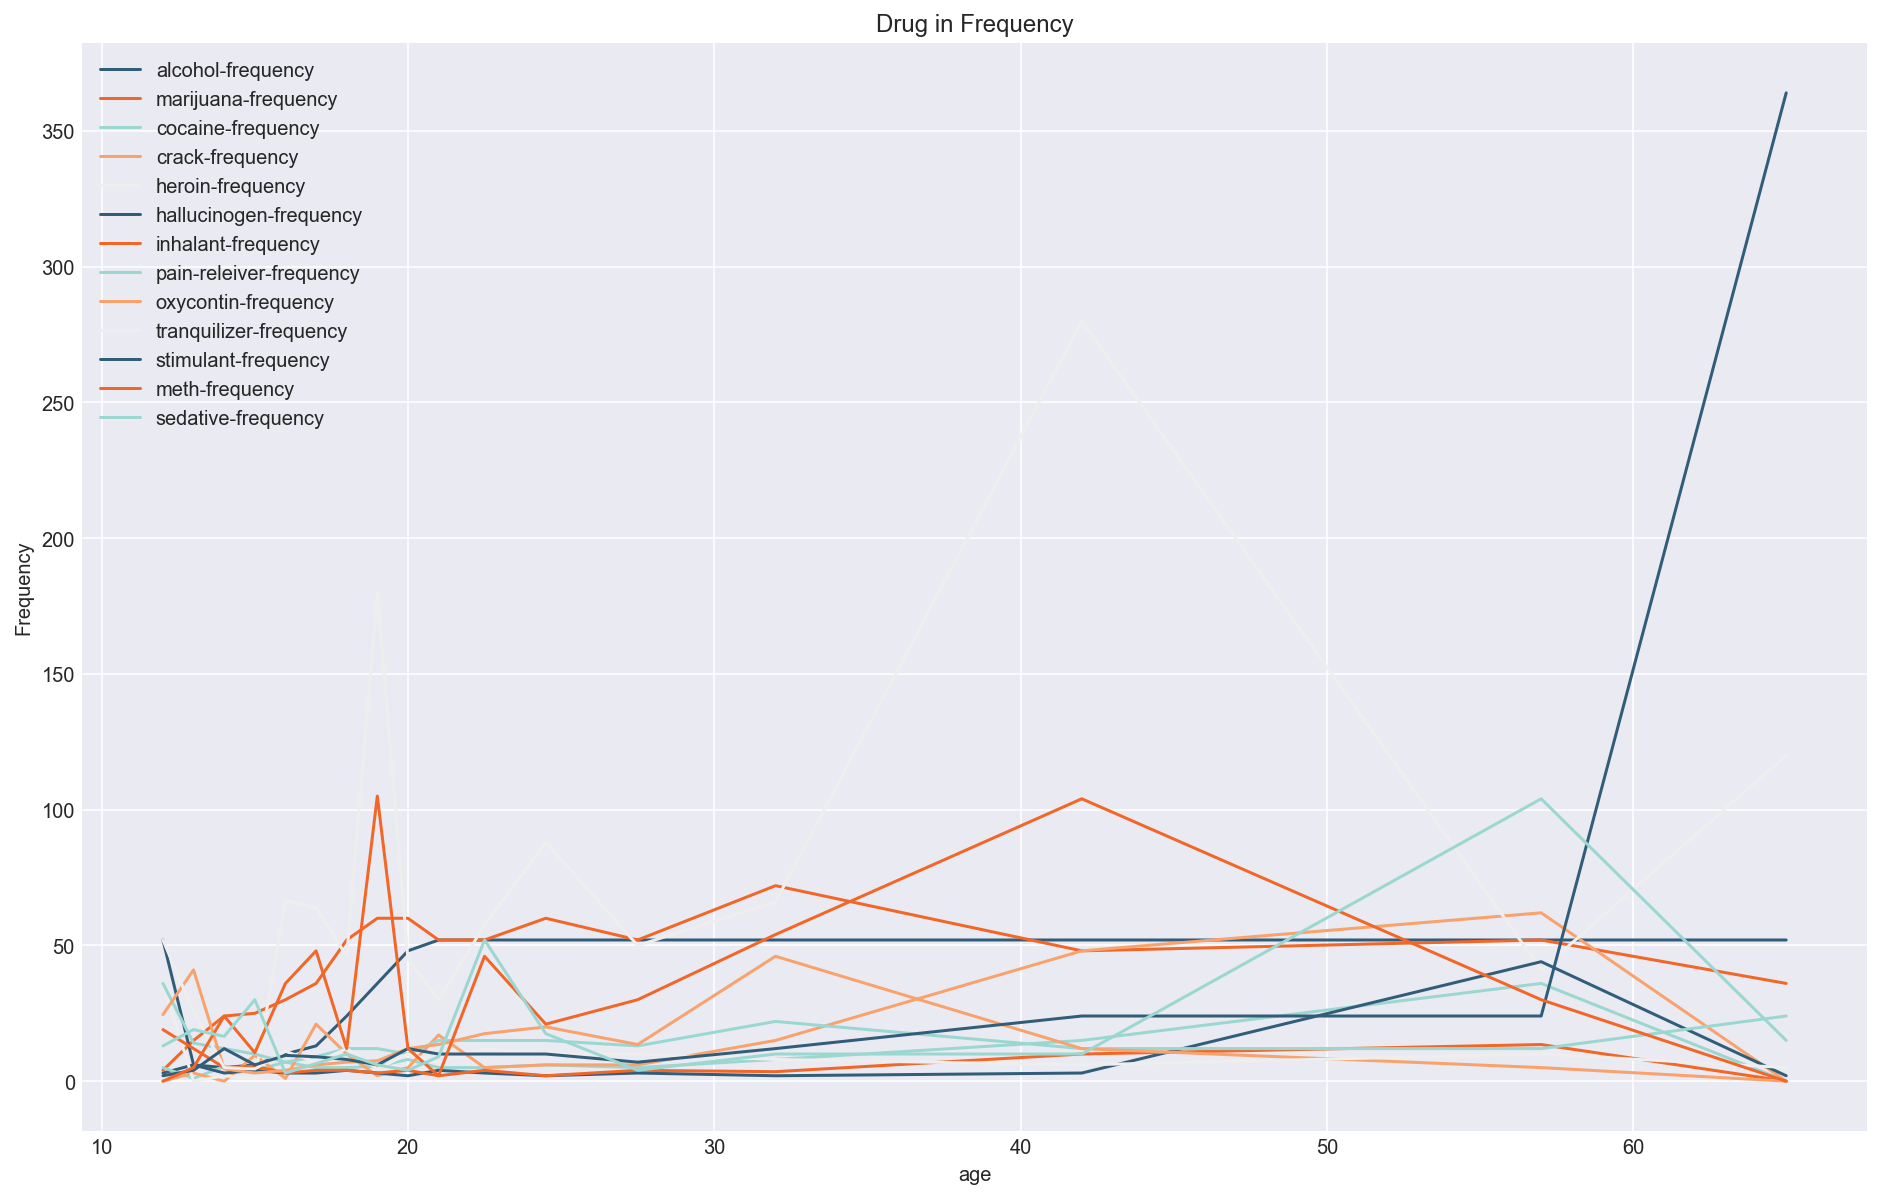

In [45]:
# Plot in Line
df_temp  = df_drug_in_freq[['age','marijuana-frequency','heroin-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]
ax = df_drug_in_freq.plot.line(figsize=(16,10), title='Drug in Frequency',x='age')
ax.set_ylabel("Frequency")

Text(0,0.5,'Frequency')

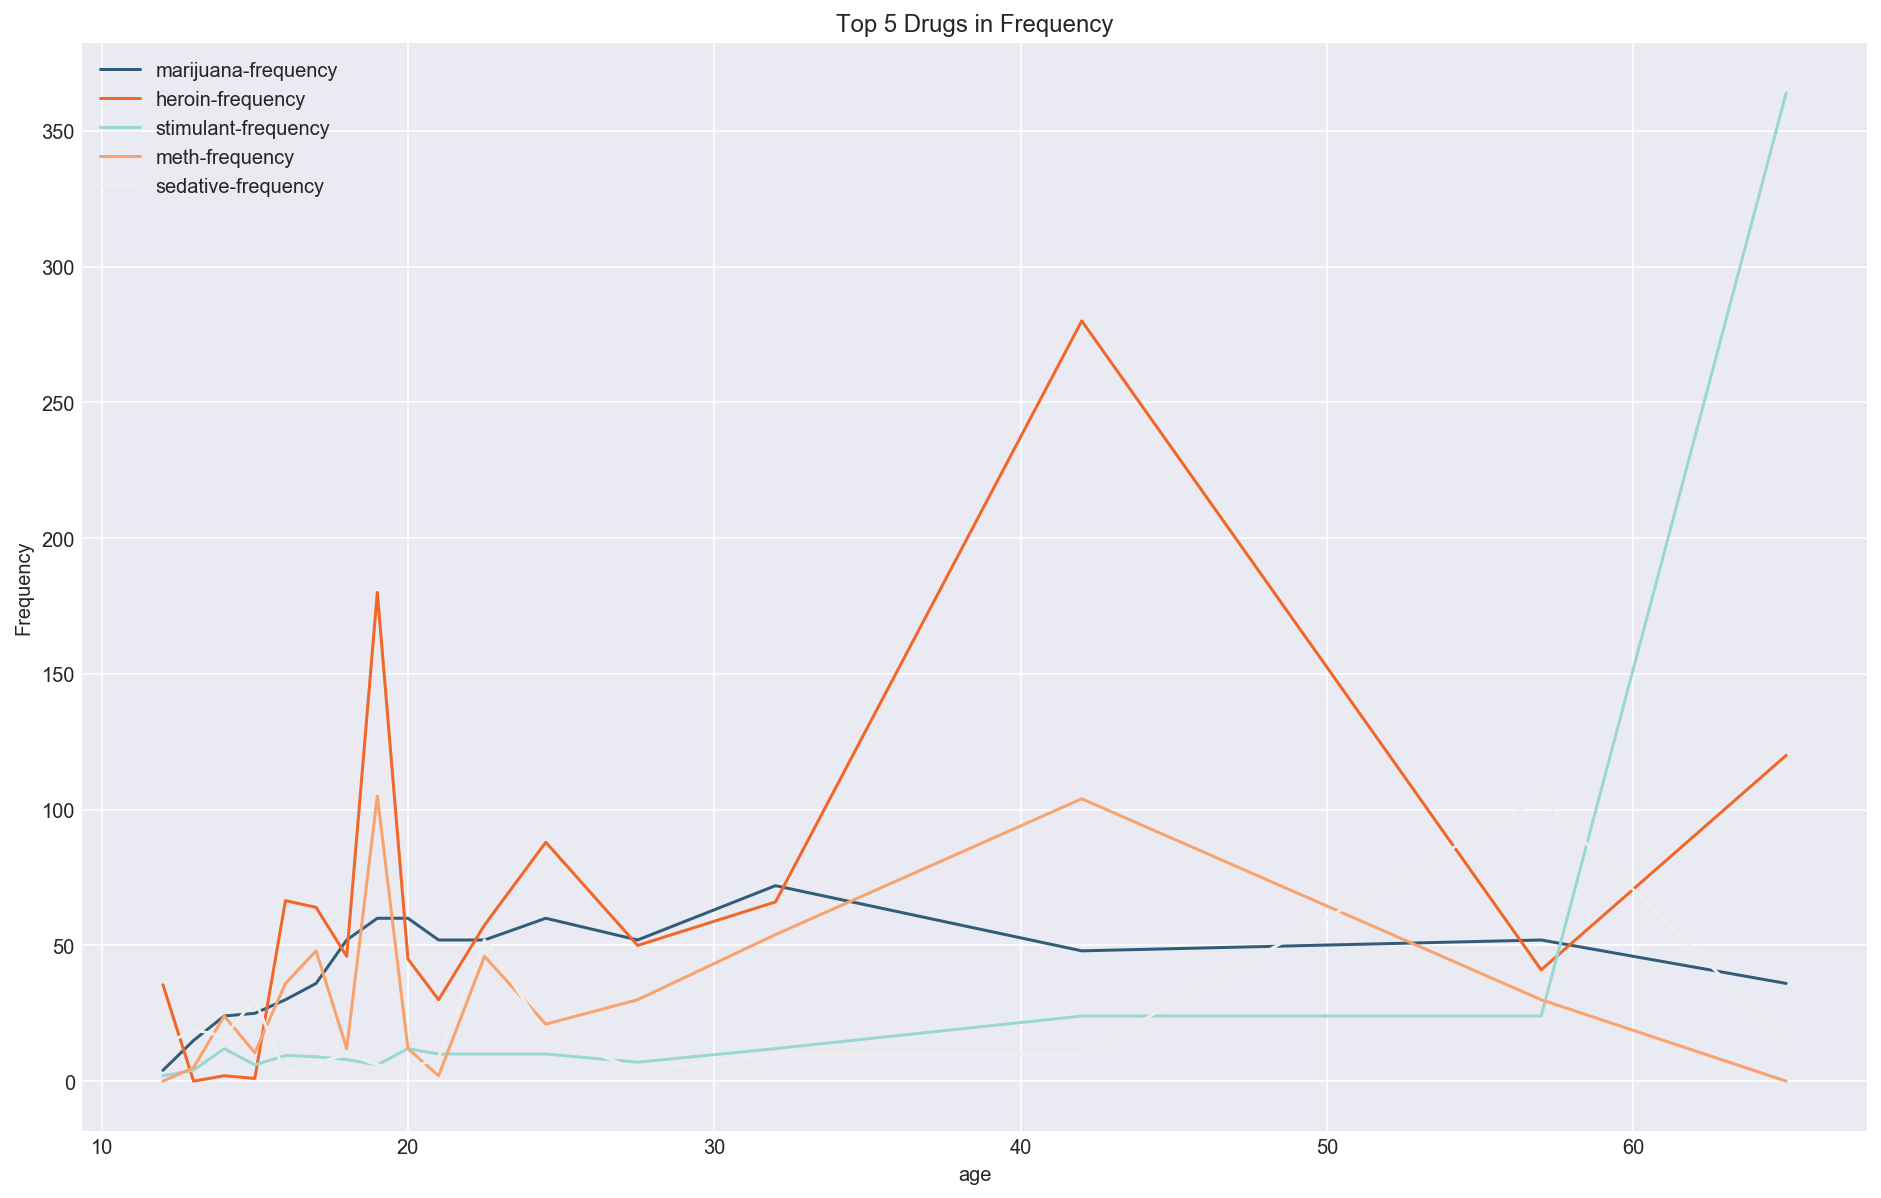

In [46]:
# Plotting top 5 frequency drug.
ax = df_temp.plot.line(figsize=(16,10), title='Top 5 Drugs in Frequency',x='age')
ax.set_ylabel("Frequency")

### Description:
- "STIMULANT-FREQUENCY" remain steady below frequency of 25% and boom quickly after the age of 57 to 364%
- "HEROIN-FREQUENCY" climb rapidly from age of 30 to 55 which peak around age of 40. Furthermore, It sharp quickly at the age of 20

In [47]:
# Create Heatmap to see the correlations
df_temp_no_age = df_drug_in_freq[['alcohol-frequency','marijuana-frequency','cocaine-frequency','crack-frequency','heroin-frequency','hallucinogen-frequency','inhalant-frequency','pain-releiver-frequency','oxycontin-frequency','tranquilizer-frequency','stimulant-frequency','meth-frequency','sedative-frequency']]

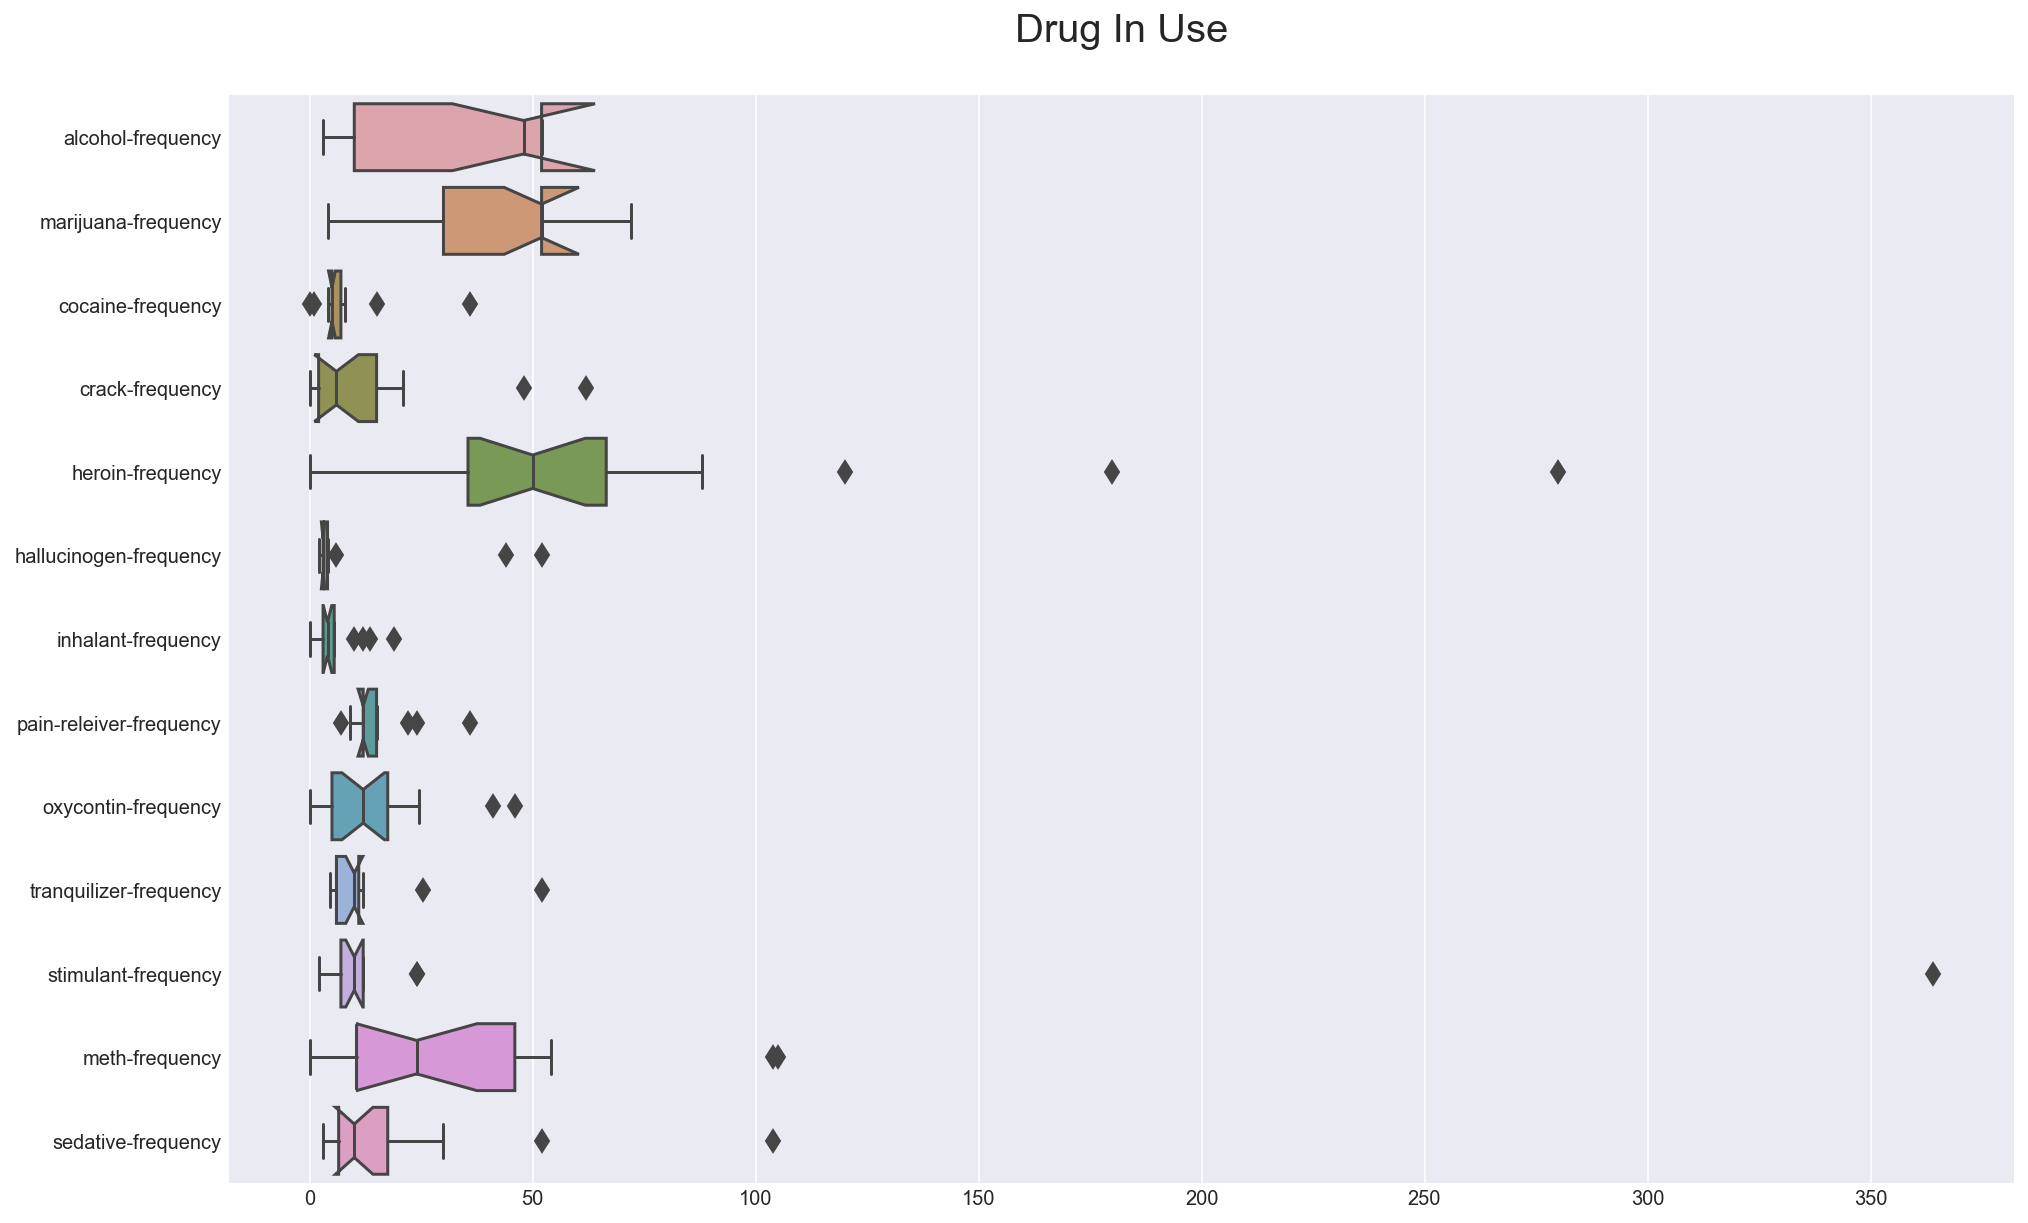

In [48]:
# Plotting in boxplot style of using drugs.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()

sns.boxplot(data=df_temp_no_age, orient='h',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_title('Drug In Use\n', fontsize=20)

plt.show()

In [49]:
iha = df_drug_in_freq['inhalant-frequency'].values
print(iha)
print(df_drug_in_use['inhalant-use'].values)
iha_mean = np.mean(iha)
iha_std = np.std(iha)
print(iha_mean, iha_std)

[19.  12.   5.   5.5  3.   4.   4.   3.   4.   2.   4.   2.   4.   3.5
 10.  13.5  0. ]
[1.6 2.5 2.6 2.5 3.  2.  1.8 1.4 1.5 1.4 1.  0.8 0.6 0.4 0.3 0.2 0. ]
5.794117647058823 4.789875423682172


In [50]:
iha_stand = (iha - iha_mean)/ iha_std
print(np.mean(iha_stand), np.std(iha_stand))

5.224578939412501e-17 0.9999999999999999


C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


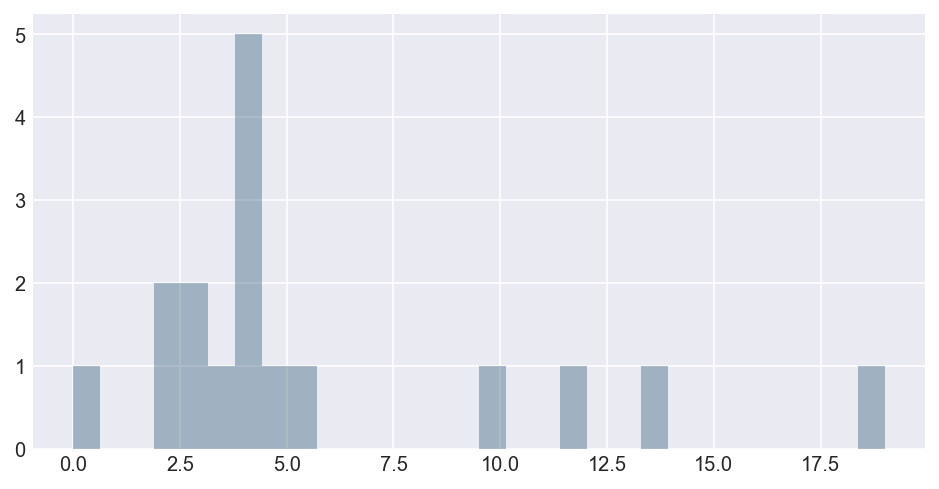

In [51]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(iha, bins=30, kde=False)
plt.show()

C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


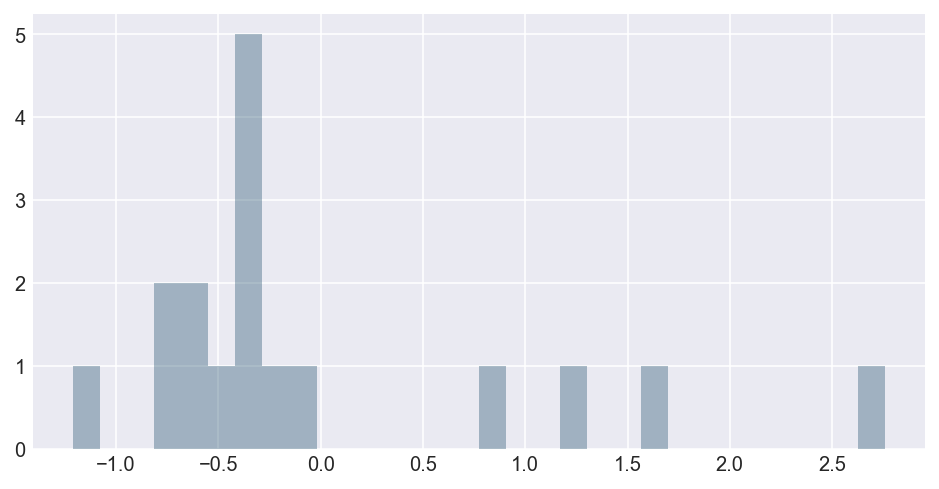

In [52]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(iha_stand, bins=30, kde=False)
plt.show()

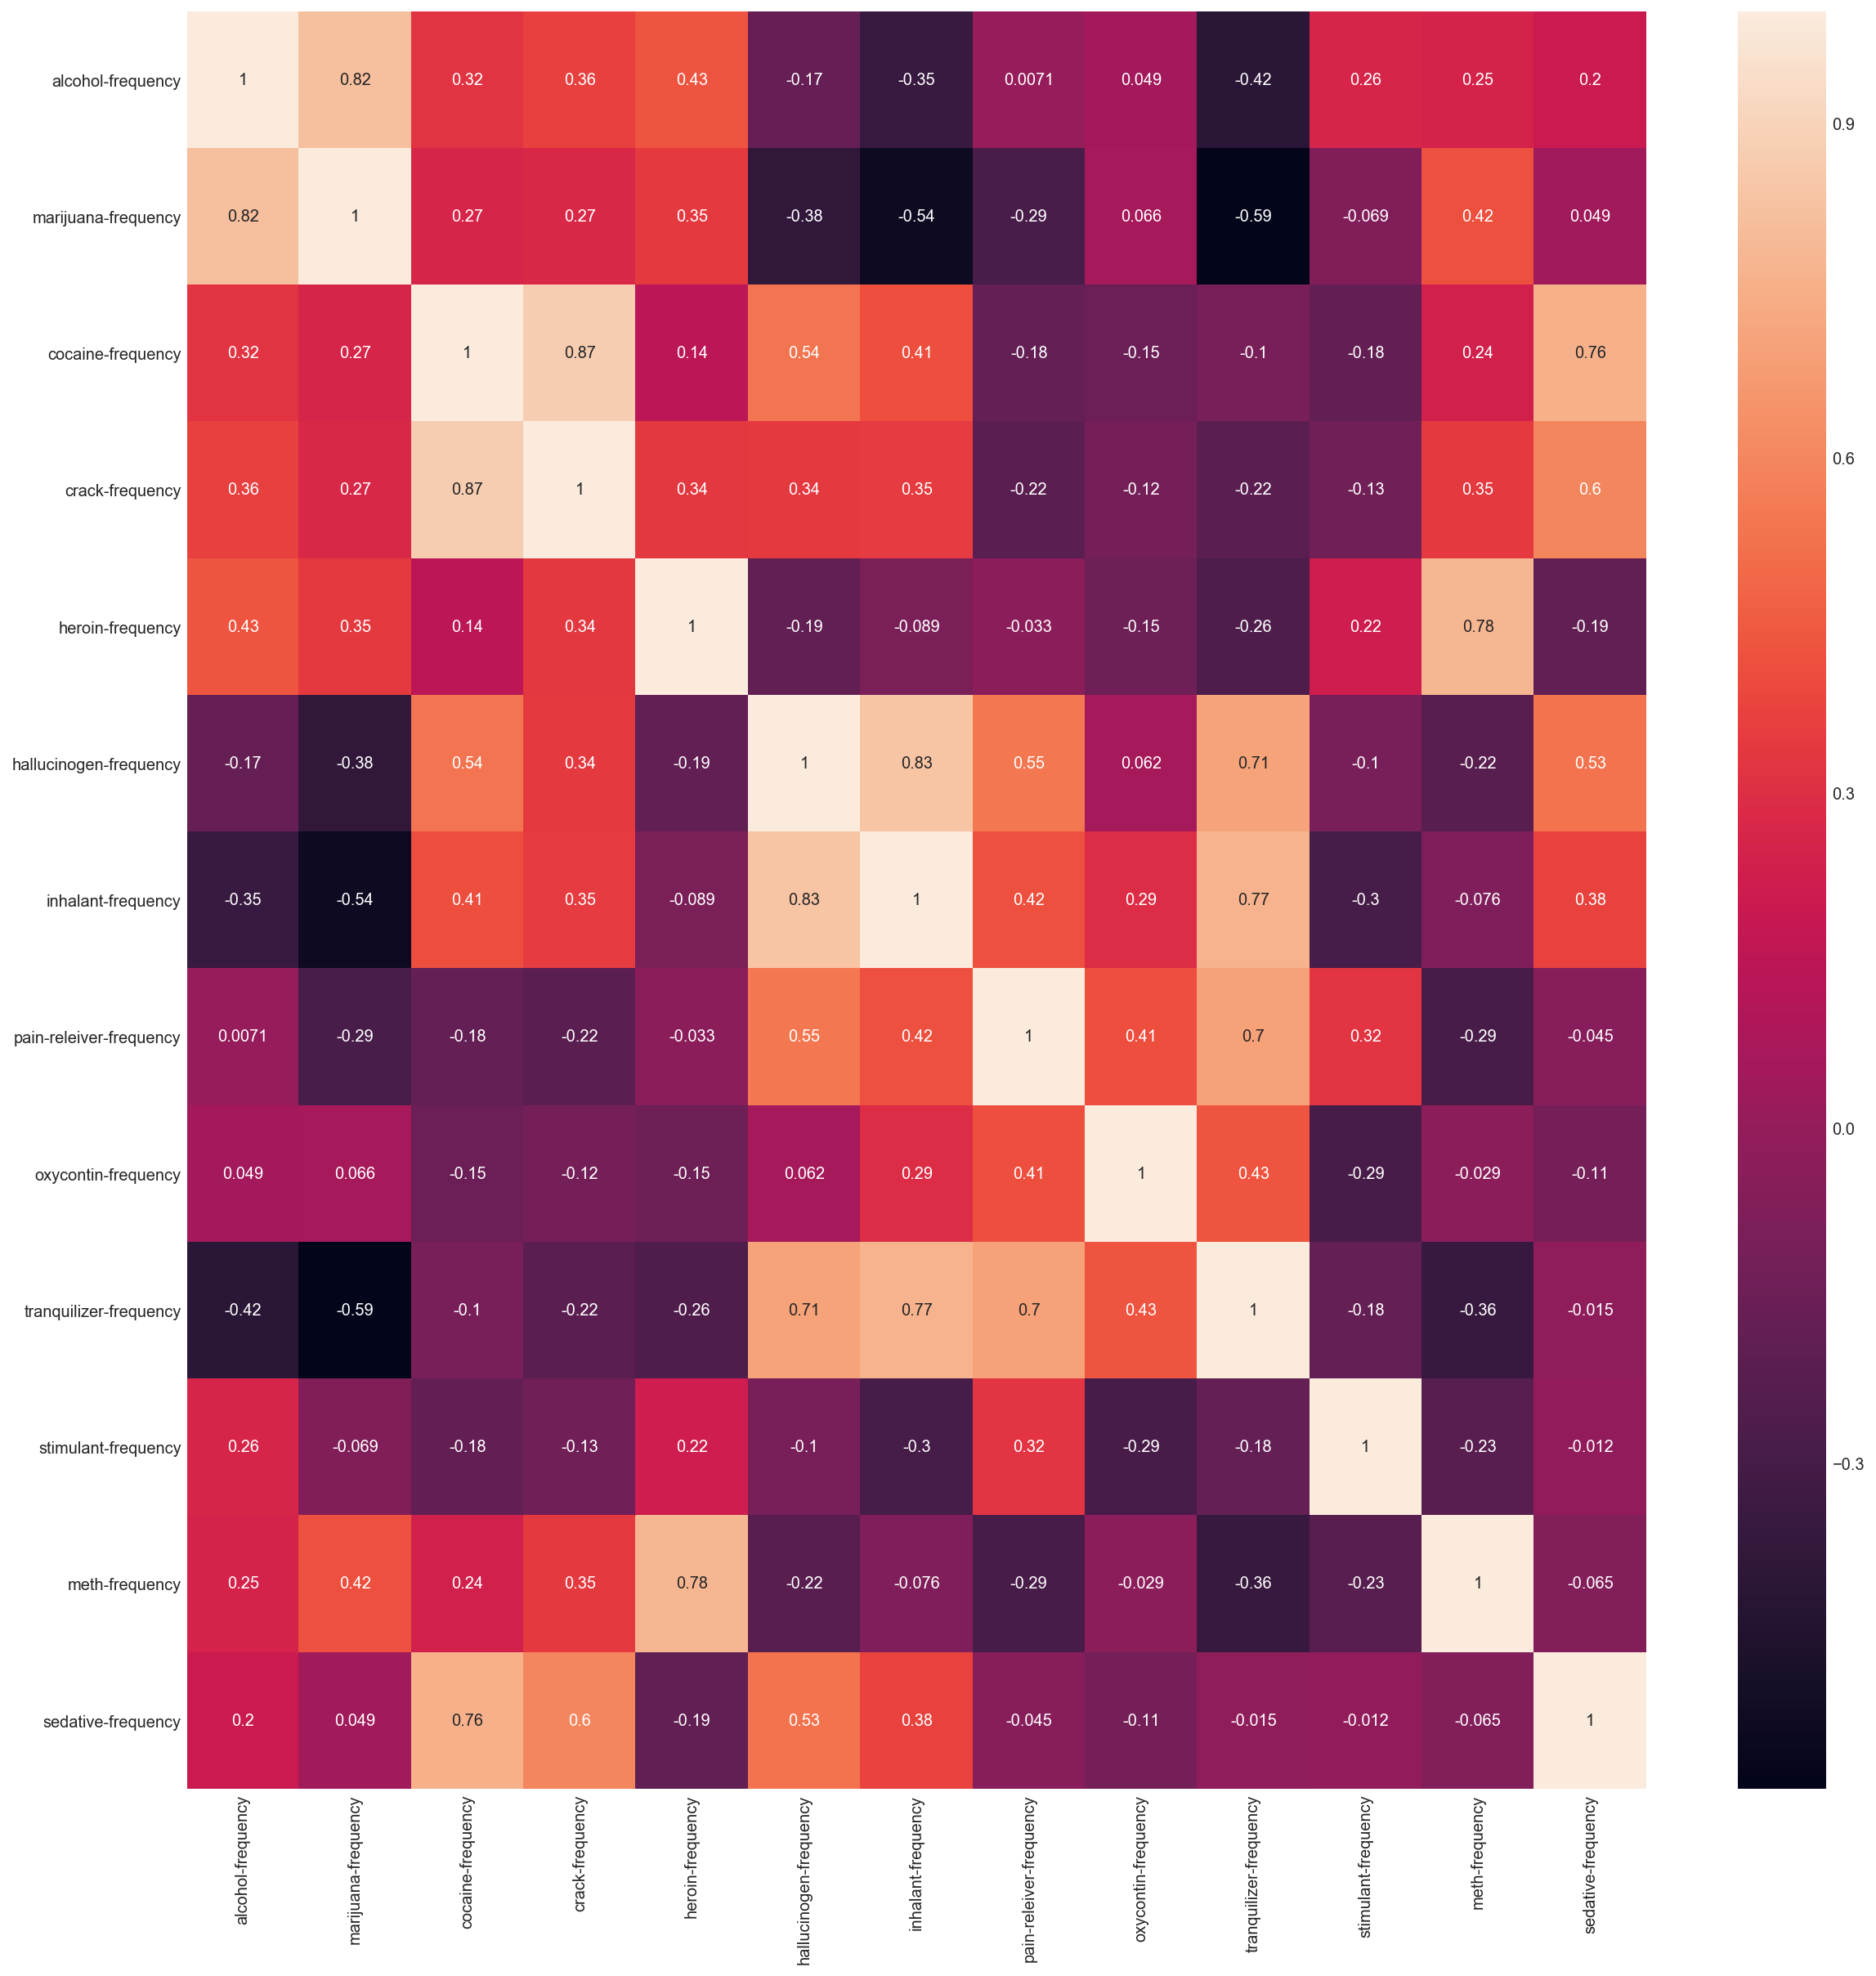

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(df_temp_no_age.corr(), annot=True)

### According to these viz above
- Overal, heatmap is in range of -0.4 to 0.95
- "OXYCONTIN-FREQUENCY" has the most netrual correlations with others frequencies.
- "TRANQUILIZER-FREQUENCY" has interesting correlations:
    - Positive relation correlations with "HALLUCINOGEN-FREQUENCY", "INHALANT-FREQUENCY" & "PAIN-RELEIVER-FREQUENCY" at 0.71, 0.77 & 0.7, respectively
    - Negative correlations with "MARIJUANA-FREQUENCY", "METH-FREQUENCY"  & "ALCOHOL-FREQUENCY" at -0.59, 0.36 & 0.42, respectively


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [54]:
# Code

In [55]:
# Stimulant Use
# Inhalant Use
list_stimulate_use = df_drug_in_use['stimulant-use']
list_inhalant_use = df_drug_in_use['inhalant-use']

# Calculate T-statistic by using scipy.stats package
# stats.ttest_ind()
t_stats = stats.ttest_ind(list_stimulate_use,list_inhalant_use)
print(t_stats)

Ttest_indResult(statistic=1.2949472731885583, pvalue=0.20460402112671847)


In [56]:
## - FROM LECTURES 2.17
# generate points on the x axis between -4 and 4:
xpoints = np.linspace(-4, 4, 500)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom: n1 + n2 - 2
ypoints = stats.t.pdf(xpoints, (50+50-2), 0, 1)

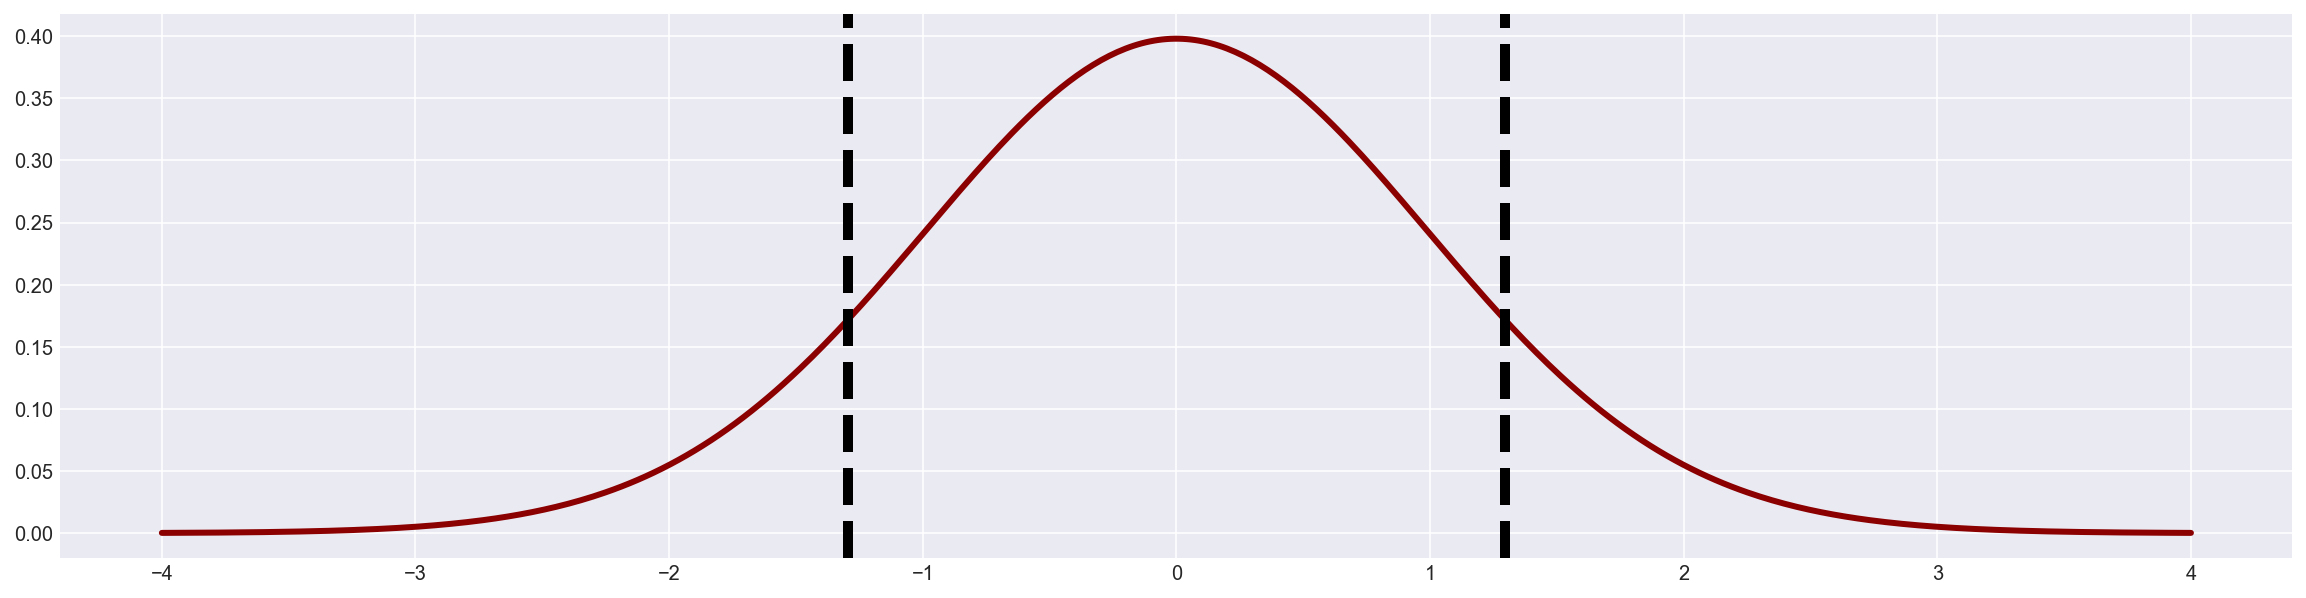

In [57]:
## - FROM LECTURES 2.17
# initialize a matplotlib "figure"
fig = plt.figure(figsize=(20,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xpoints, ypoints, linewidth=3, color='darkred')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t_stats[0], color='black', linestyle='--', lw=5, label = 'T statistics')
ax.axvline(-t_stats[0], color='black', linestyle='--', lw=5)

C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Shaynie\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


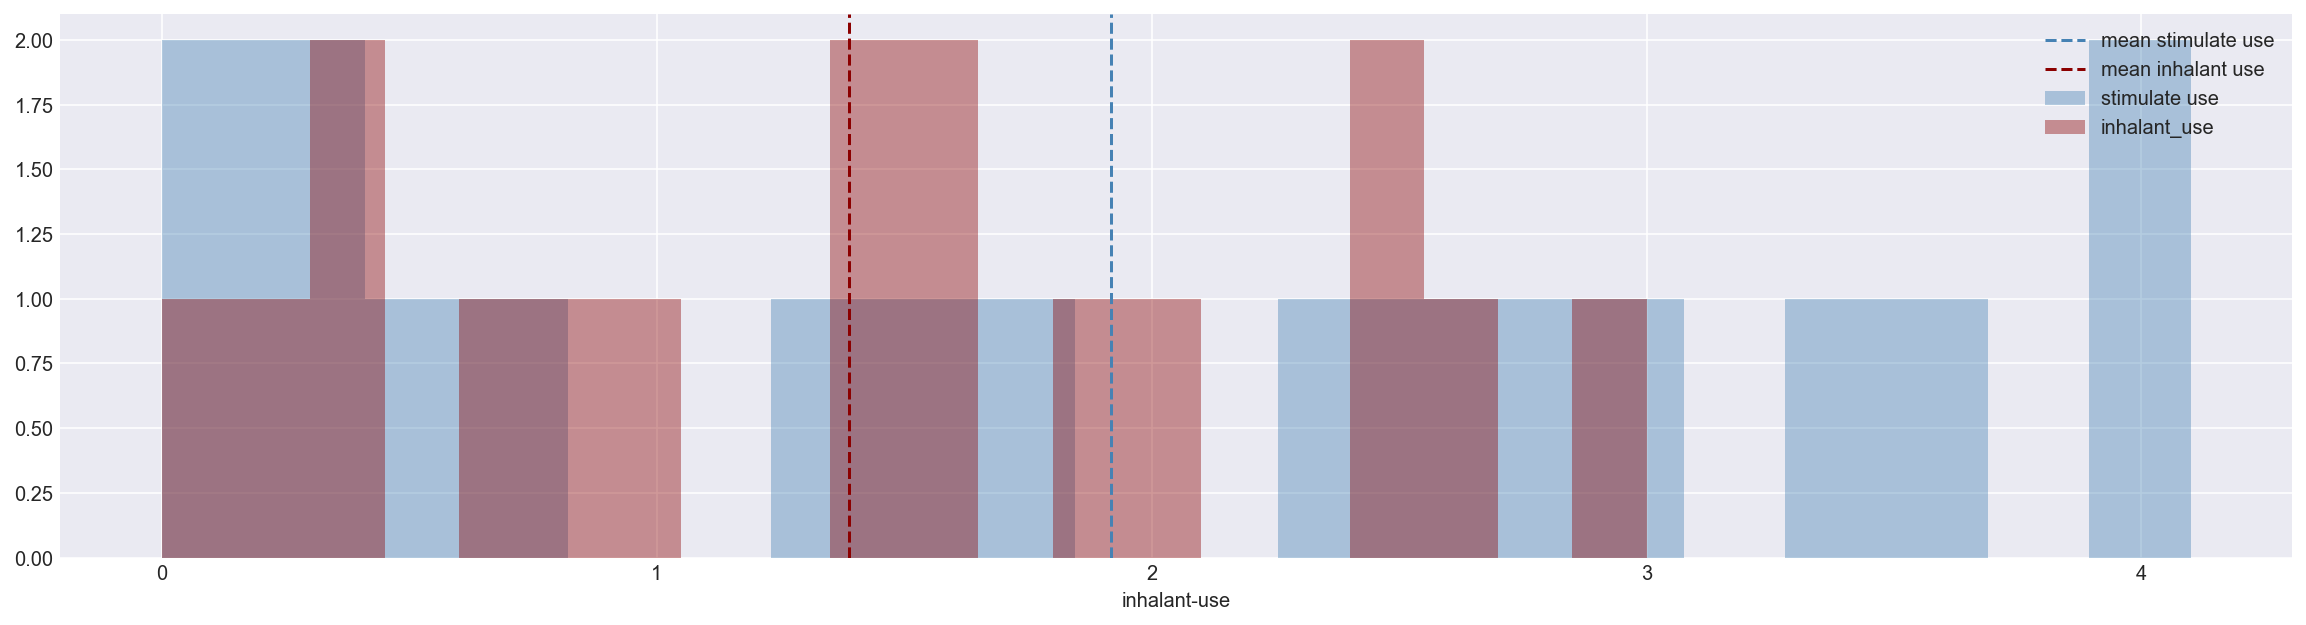

In [58]:
# Plotting by distplot to compare Stimulant & Inhalant Use
## initialize a matplotlib figure
fig = plt.figure(figsize=(20,5))

## get the current axis out of the figure
ax = fig.gca()

ax = sns.distplot(list_stimulate_use,bins=20,color='steelblue', ax=ax, label='stimulate use',kde=False)
sns.distplot(list_inhalant_use, bins=20, color='darkred', ax=ax, label='inhalant_use',kde=False)
plt.axvline(x=list_stimulate_use.mean(),color='steelblue', linestyle='--', label='mean stimulate use')
plt.axvline(x=list_inhalant_use.mean(), color='darkred', linestyle='--', label='mean inhalant use')
plt.legend();

In [59]:
np.corrcoef(list_stimulate_use, list_inhalant_use)

array([[1.        , 0.10838076],
       [0.10838076, 1.        ]])

In [60]:
list_stimulate_use.mean() - list_inhalant_use.mean()

0.529411764705882

In [61]:
stats.levene(list_stimulate_use,list_inhalant_use)

LeveneResult(statistic=5.158664546899844, pvalue=0.029995563579109052)

## **Report**



> **H0:** The mean between the stimulate and inhalant use groups is 0.

> **H1:** The mean between the stimulate and inhalant use groups is not 0.

#### 1. Difference of group means
> Different: ** 0.5284**

####  2. Correlations between variables
> Value: ** 0.108**

> P-value: ** 0.2046 **

#### 3 Conclusion
- We can see from these details above that the correlations between 2 variables, stimulate and inhalant drug use, is quite neutral at **0.108**. 
- In our specific example, we have measured a difference in drug usage of **0.5294** between the stimulate and inhalant groups. We then calculated a t-statistic associated with this difference of **1.29**.
- Hence, by using alpha 0.05, mean 95% confidence interval, we can prove that our test is **fail to reject the null hypothesis**.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

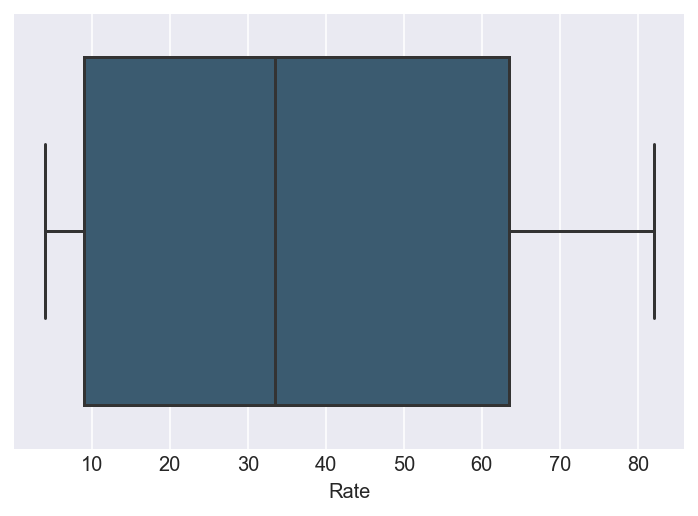

In [62]:
# Pull out the rate variable from the sat dataset.
list_rate = df_sat_score['Rate'].values

# Ploting with boxplot
sns.boxplot(x=df_sat_score['Rate'])

In [63]:
# Are there outliers in the dataset? Define, in words, how you numerically define outliers.
rate_median = np.median(list_rate)
lower_quartile = np.percentile(list_rate, 25)
upper_quartile = np.percentile(list_rate, 75)
print(lower_quartile, upper_quartile)
range_quartile = upper_quartile - lower_quartile

## Calulate Inner Fence (From Lower Inner Fence to Upper Inner Fence)
i_lower_fence = lower_quartile - 1.5 * range_quartile
i_upper_fence = upper_quartile + 1.5 * range_quartile

## Calculate Outer Fence (From Lower Outer Fence to Upper Outer Fence)
o_lower_fence = lower_quartile - 3.0 * range_quartile
o_upper_fence = upper_quartile + 3.0 * range_quartile

print(i_lower_fence, i_upper_fence)

9.0 63.5
-72.75 145.25


In [64]:
# Show 'Rate' in list before checking outliers
list_rate

array([82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56,
       55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12,
       12, 11, 11,  9,  9,  9,  8,  8,  8,  7,  6,  6,  5,  5,  4,  4,  4,
       45], dtype=int64)

In [65]:
# list possible outliers beyond lower_fence and above upper_fence:
outliers = filter(lambda x: i_lower_fence > x or i_upper_fence < x, list_rate)
print(list(outliers))

[]


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [66]:
# How does the spearman correlation compare to 
#           the pearson correlation?

In [67]:
# Describe clearly in words the process of 
#           calculating the spearman rank correlation.

#### ANSWER 9.1 Sub 2
1. Identified Dataframe where 2 variable located and separate them into difference Series

    Ex: 
        series_verbal represent named for Verbal
        series_math represent named for Math
2. Calculate the rank of x and y which represent Verbal & Math, respectively.
    Ex:
        xranks is done by pd.Series(x).rank()
        yranks is done by pd.Series(y).rank()
3. Import scipy.stats library as stats
4. Calculate Pearson's correlation coefficient on the ranked versions of the data, which are done by step 2.
    Ex:
        stats.pearsonr(xranks, yranks)
5. Results from step 4 will be a list with 2 indexs. Hence, the spearman_rank_correlation will be first index of result.

In [68]:
# ANSWER 9.1 Sub 2
stats.pearsonr(df_sat_score['Verbal'].rank(), df_sat_score['Math'].rank())

(0.9052048847940285, 3.235231959777449e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [69]:
# Convert Rate to percentiles in the sat scores as a new column.
df_sat_score['percentiles_Rate'] = df_sat_score['Rate'].apply([lambda row: stats.percentileofscore(list_rate,row)])
# df_sat_score

In [70]:
# Show the percentile of California in Rate.
df_sat_score.loc[df_sat_score['State'] == 'CA']

,State,Rate,Verbal,Math,diff_Verbal_Math,percentiles_Rate
23,CA,51,498,517,-19,56.730769


In [71]:
# How is percentile related to the spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.